In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install roboflow



from roboflow import Roboflow
rf = Roboflow(api_key=<Enter Your API Key>)# <Enter Your API Key>
project = rf.workspace("diameteridentifier").project("material_detector_v2") # Enter the Project Name
version = project.version(1)
dataset = version.download("yolov8-obb")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Material_Detector_V2-1 in yolov8-obb:: 100%|██████████| 1430/1430 [00:00<00:00, 4436.35it/s]


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!nvidia-smi

Tue Aug 20 11:13:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:

!yolo task=detect mode=train model=yolov8x.pt data= /content/Material_Detector_V2-1/data.yaml epochs=100 imgsz=640 plots=True

100% 131M/131M [00:00<00:00, 218MB/s]
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Material_Detector_V2-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

In [5]:
import shutil
src = '/content/runs'
des = '/content/drive/MyDrive/Object_detections/model1'
shutil.copytree(src, des)

'/content/drive/MyDrive/Object_detections/model1'

In [6]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Material_Detector_V2-1/data.yaml

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/Material_Detector_V2-1/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.66s/it]
                   all         59        118          1          1      0.995      0.995
          Inner-Circle         59         59          1          1      0.995      0.995
          Outer-Circle         59         59      0.999          1      0.995      0.995
Speed: 8.6ms preprocess, 64.4ms inference, 0.0ms loss, 23.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
import os
path = '/content/drive/MyDrive/Object_detections/model1/detect/train'
images =[img for img in os.listdir(path) if img.endswith('.jpg') or img.endswith('.png')]

In [9]:
len(images)

19

In [11]:
for img in images:
    Image(filename= os.path.join(path, images[0]), width=600)

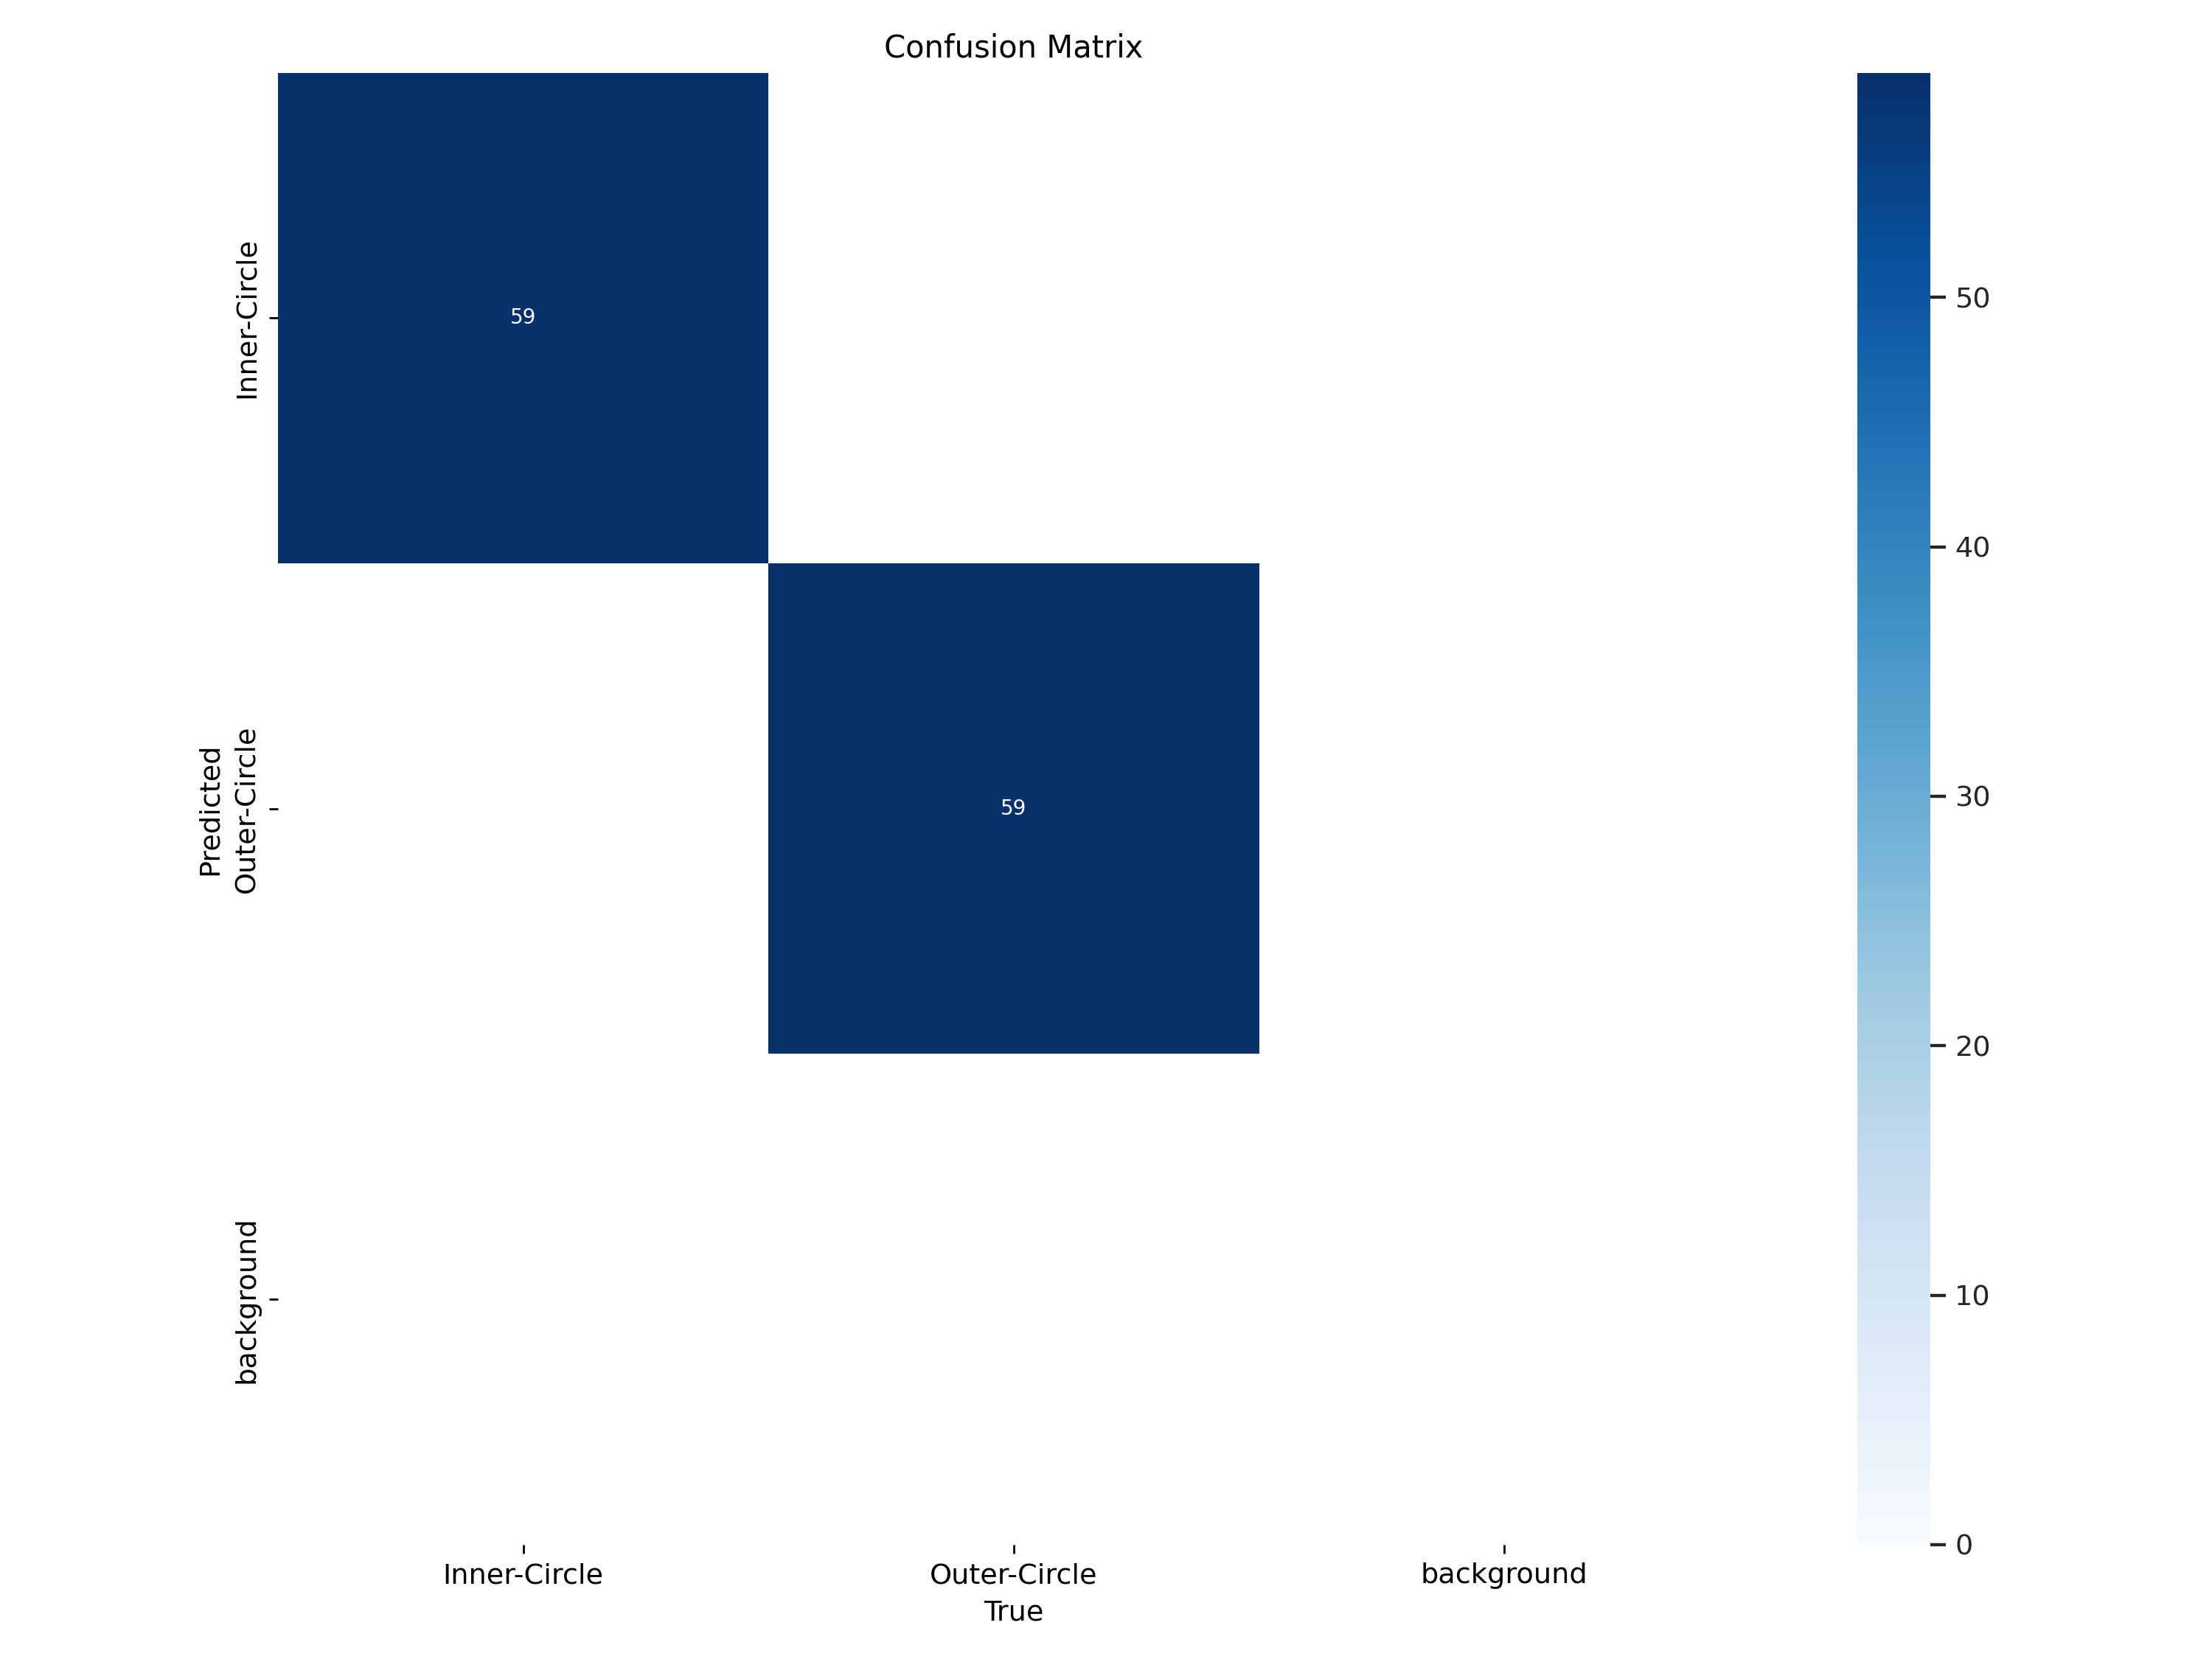

In [12]:
Image(filename= os.path.join(path, images[0]), width=600)

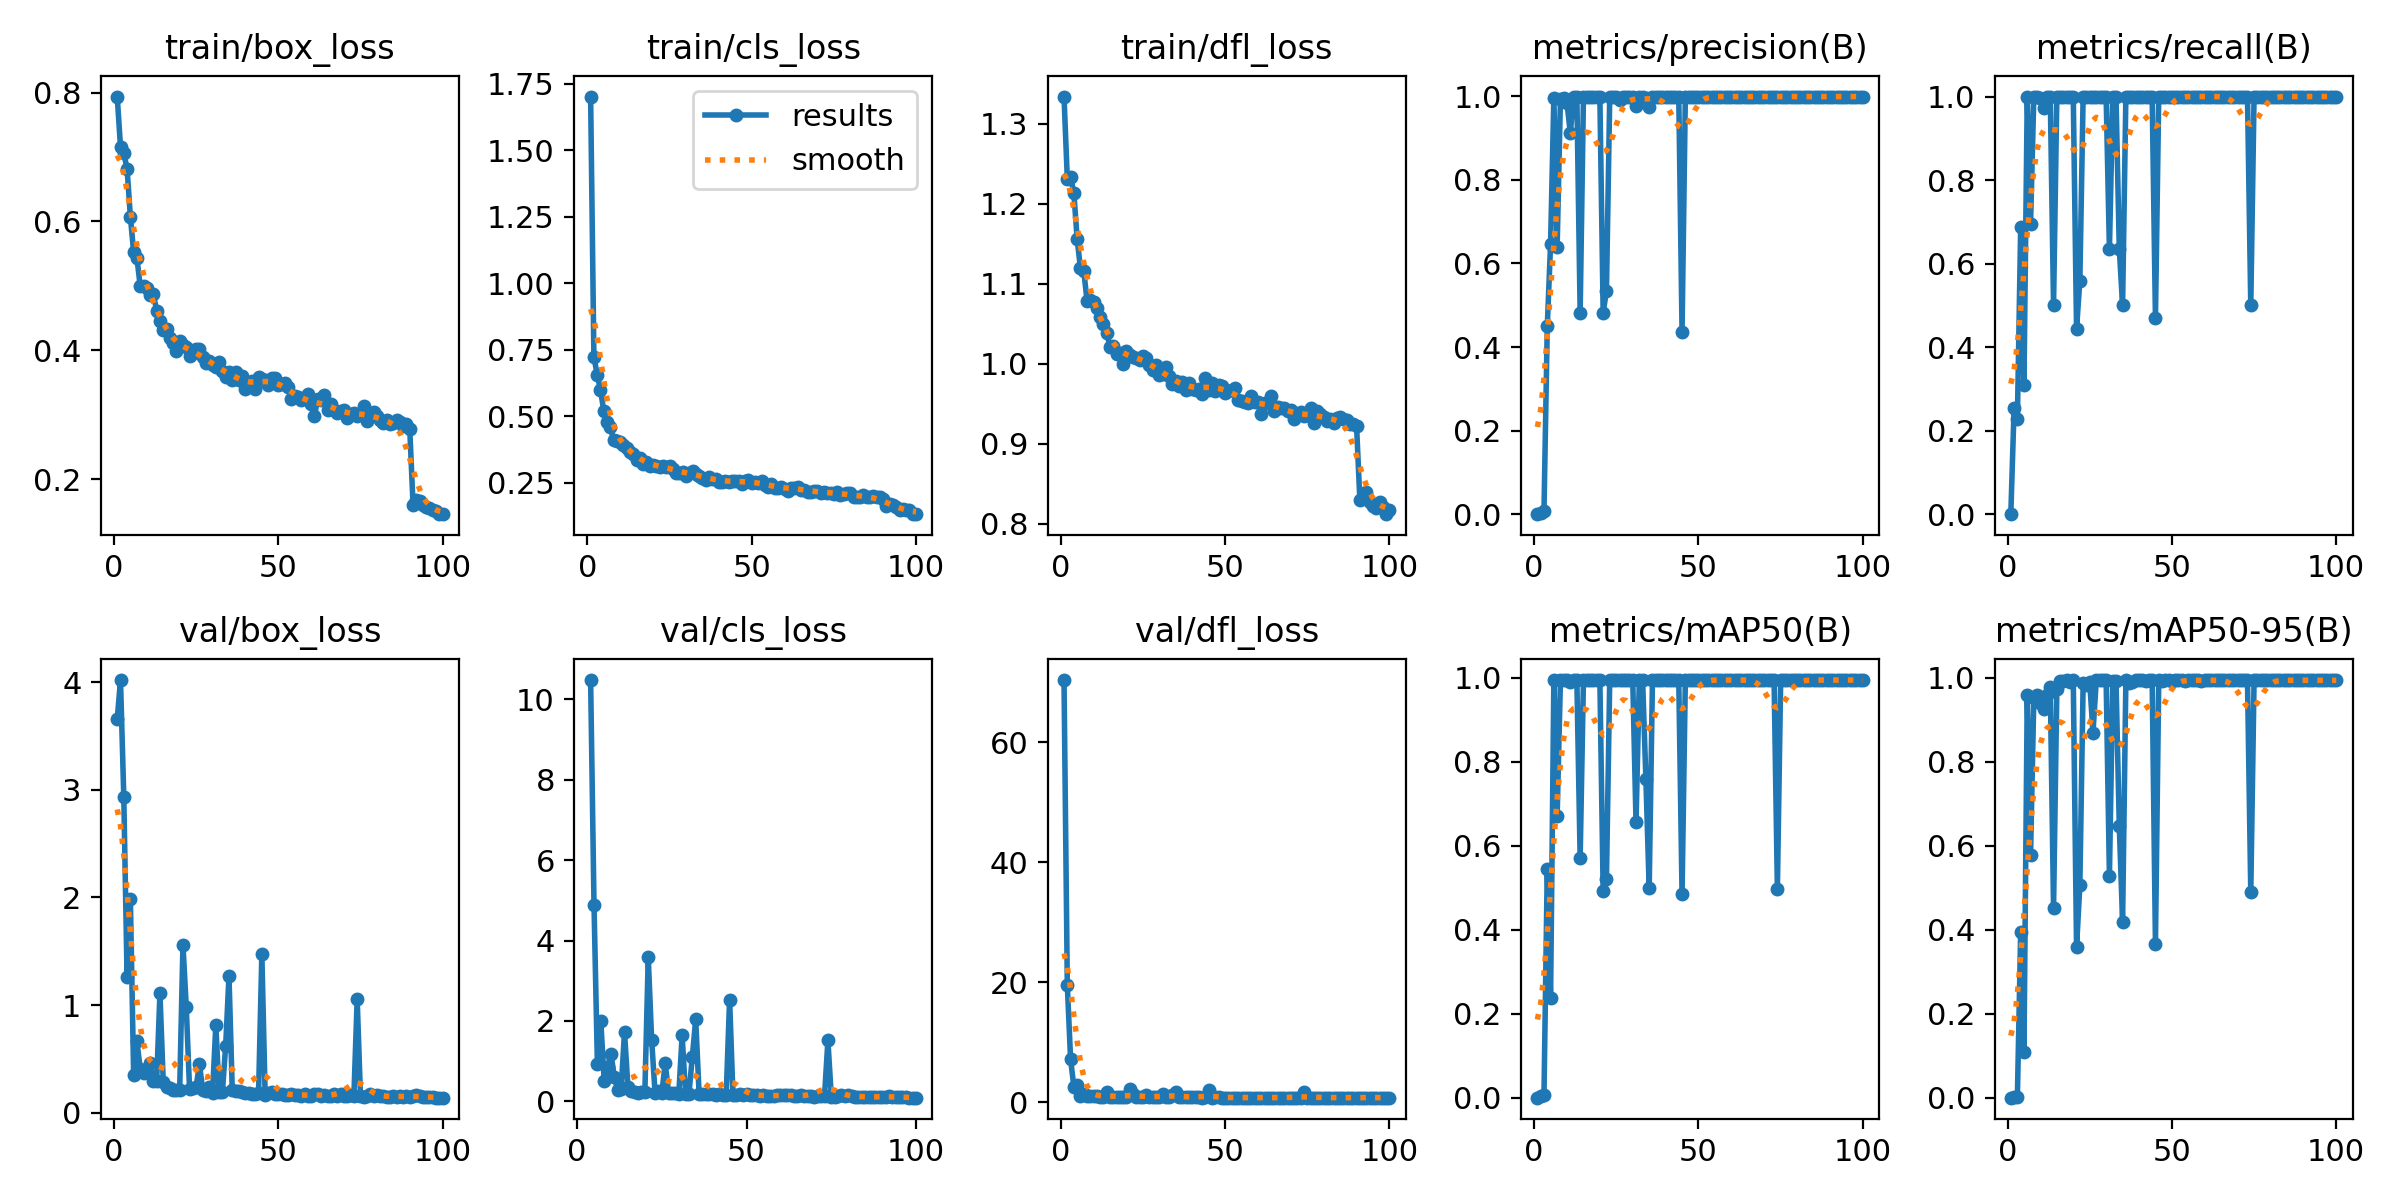

In [13]:
Image(filename= os.path.join(path, images[1]), width=600)

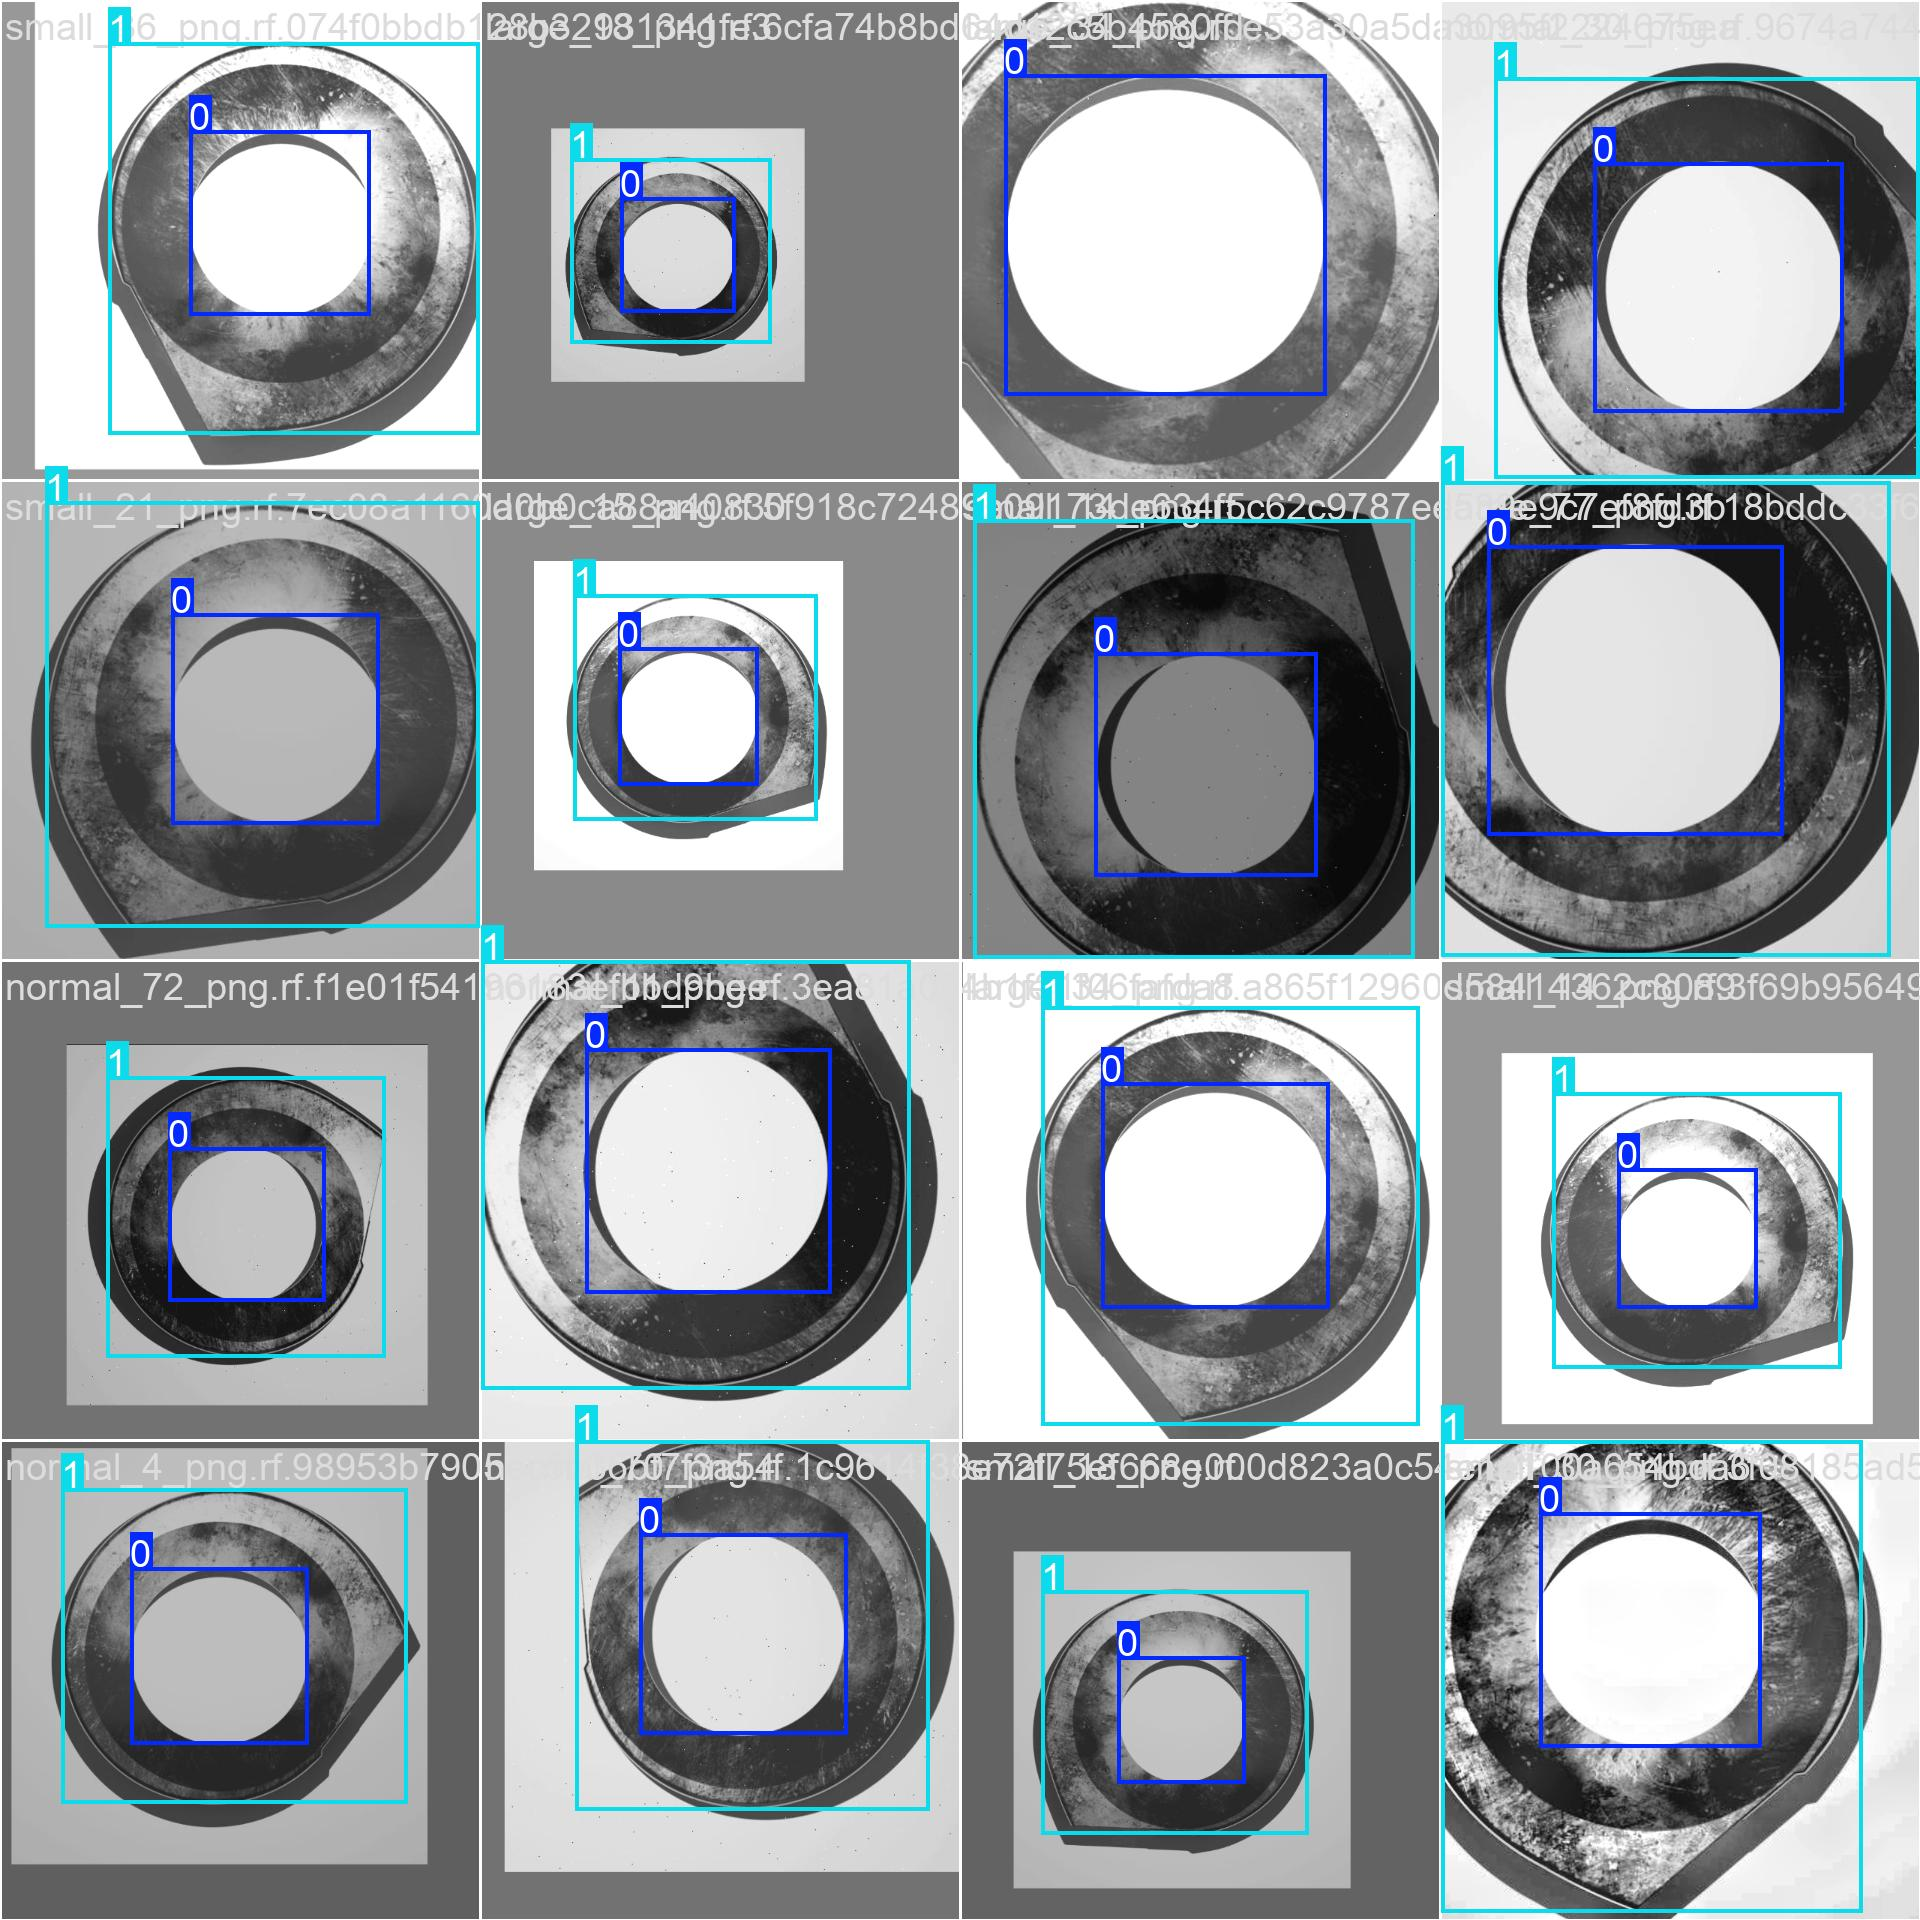

In [14]:
Image(filename= os.path.join(path, images[2]), width=600)

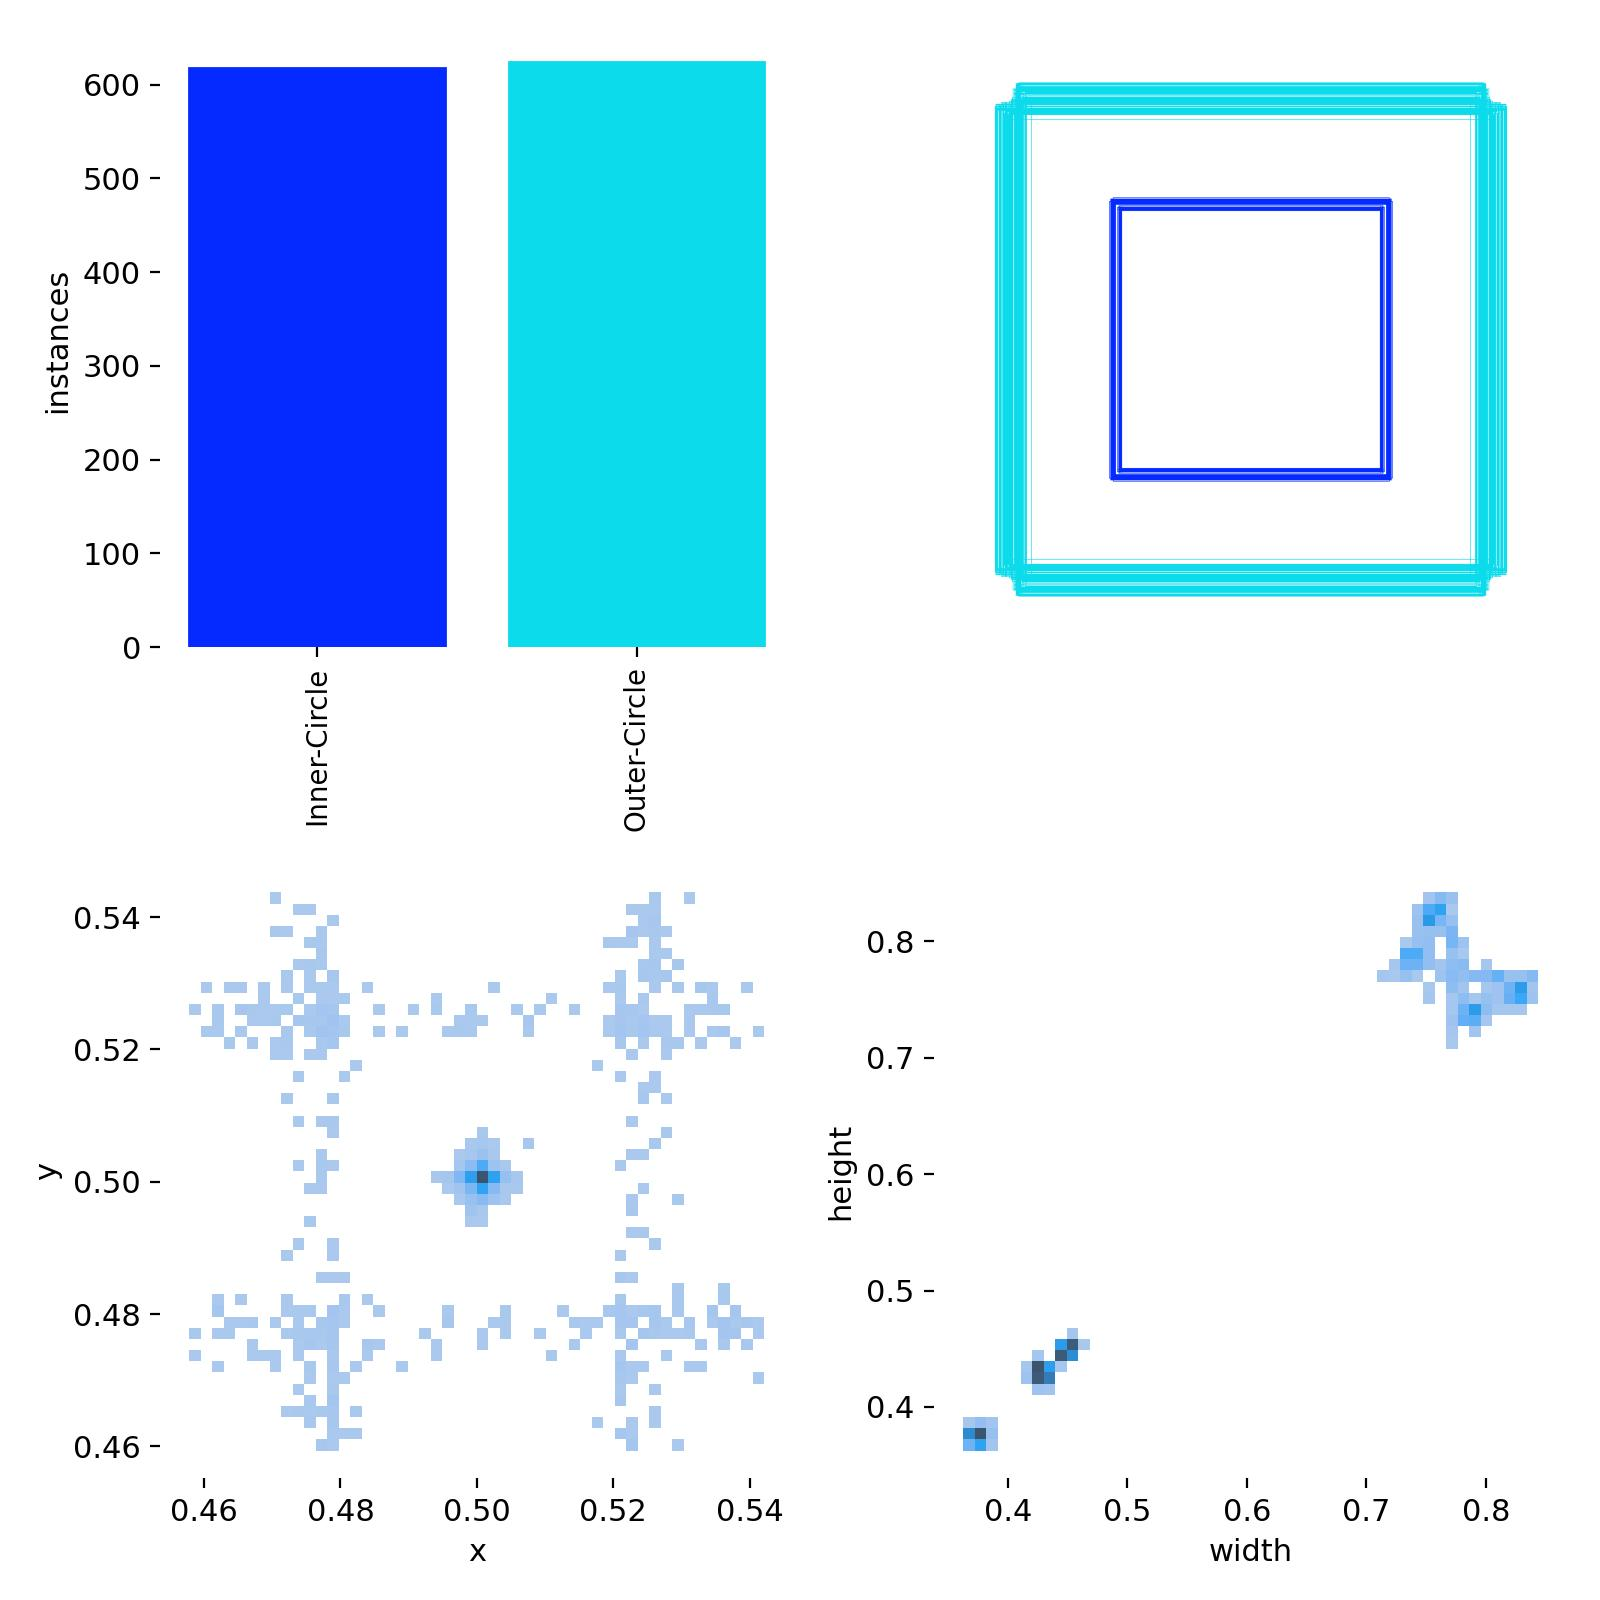

In [15]:
Image(filename= os.path.join(path, images[3]), width=600)

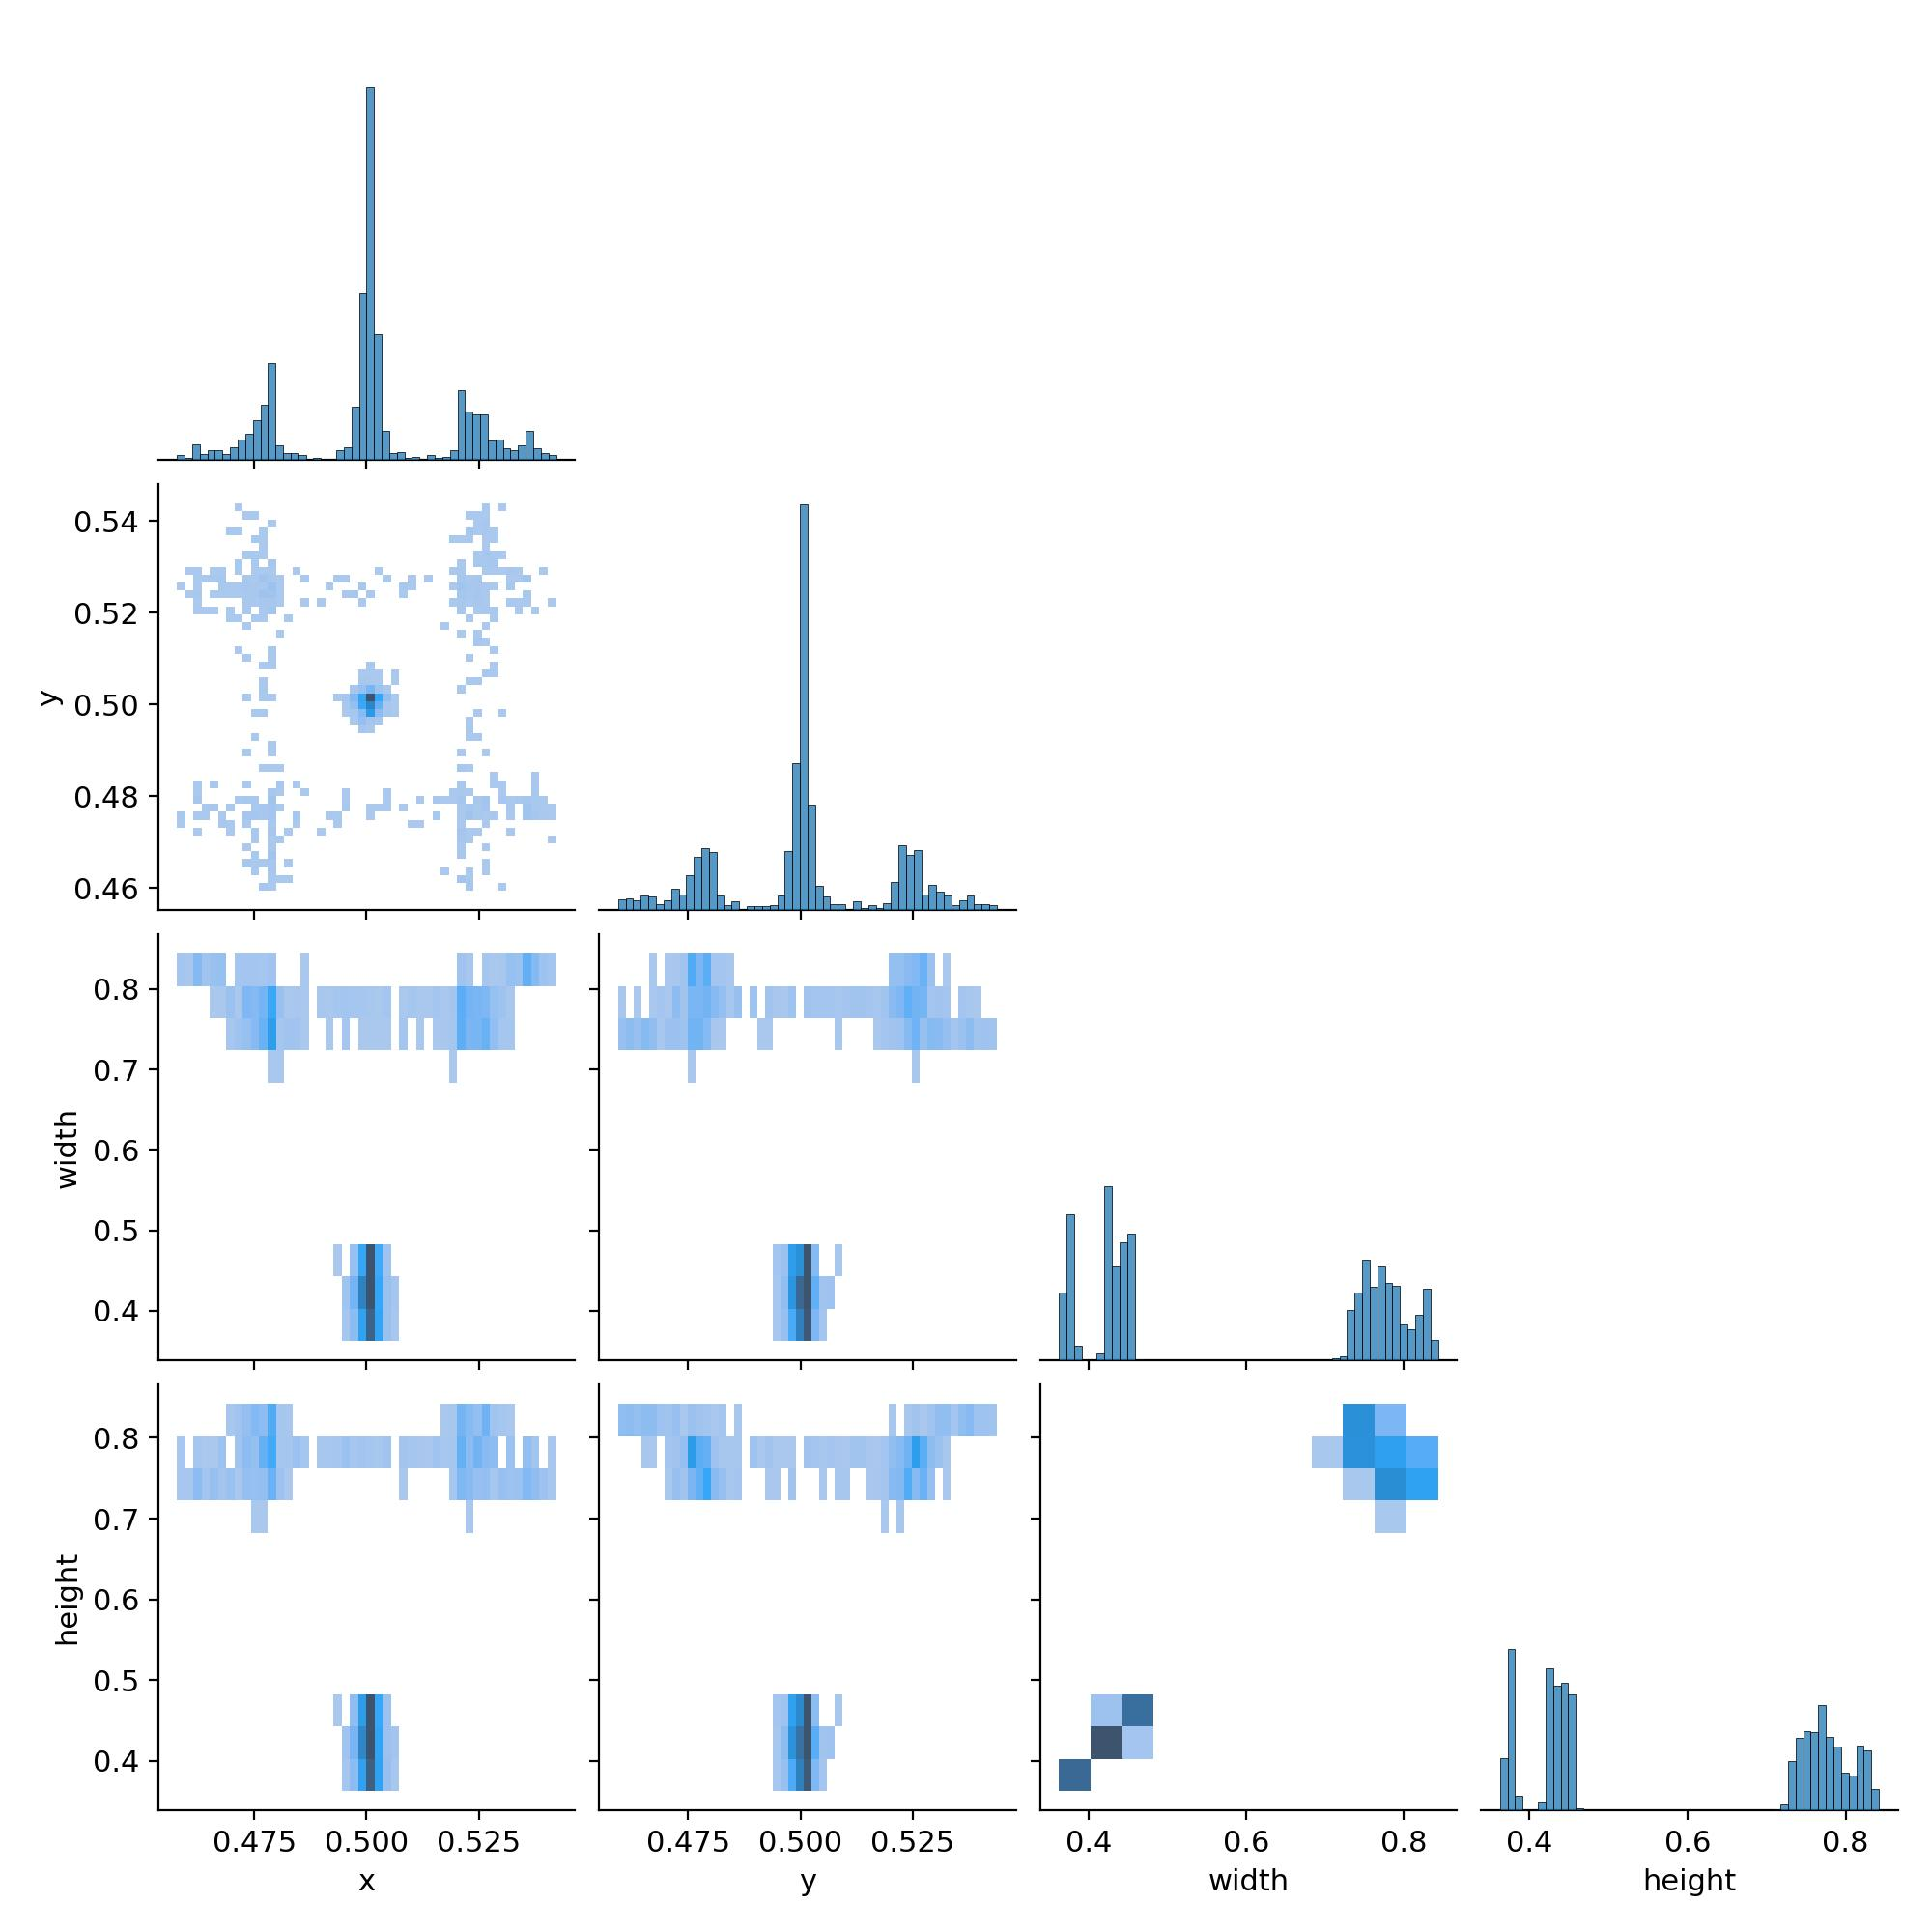

In [16]:
Image(filename= os.path.join(path, images[4]), width=600)

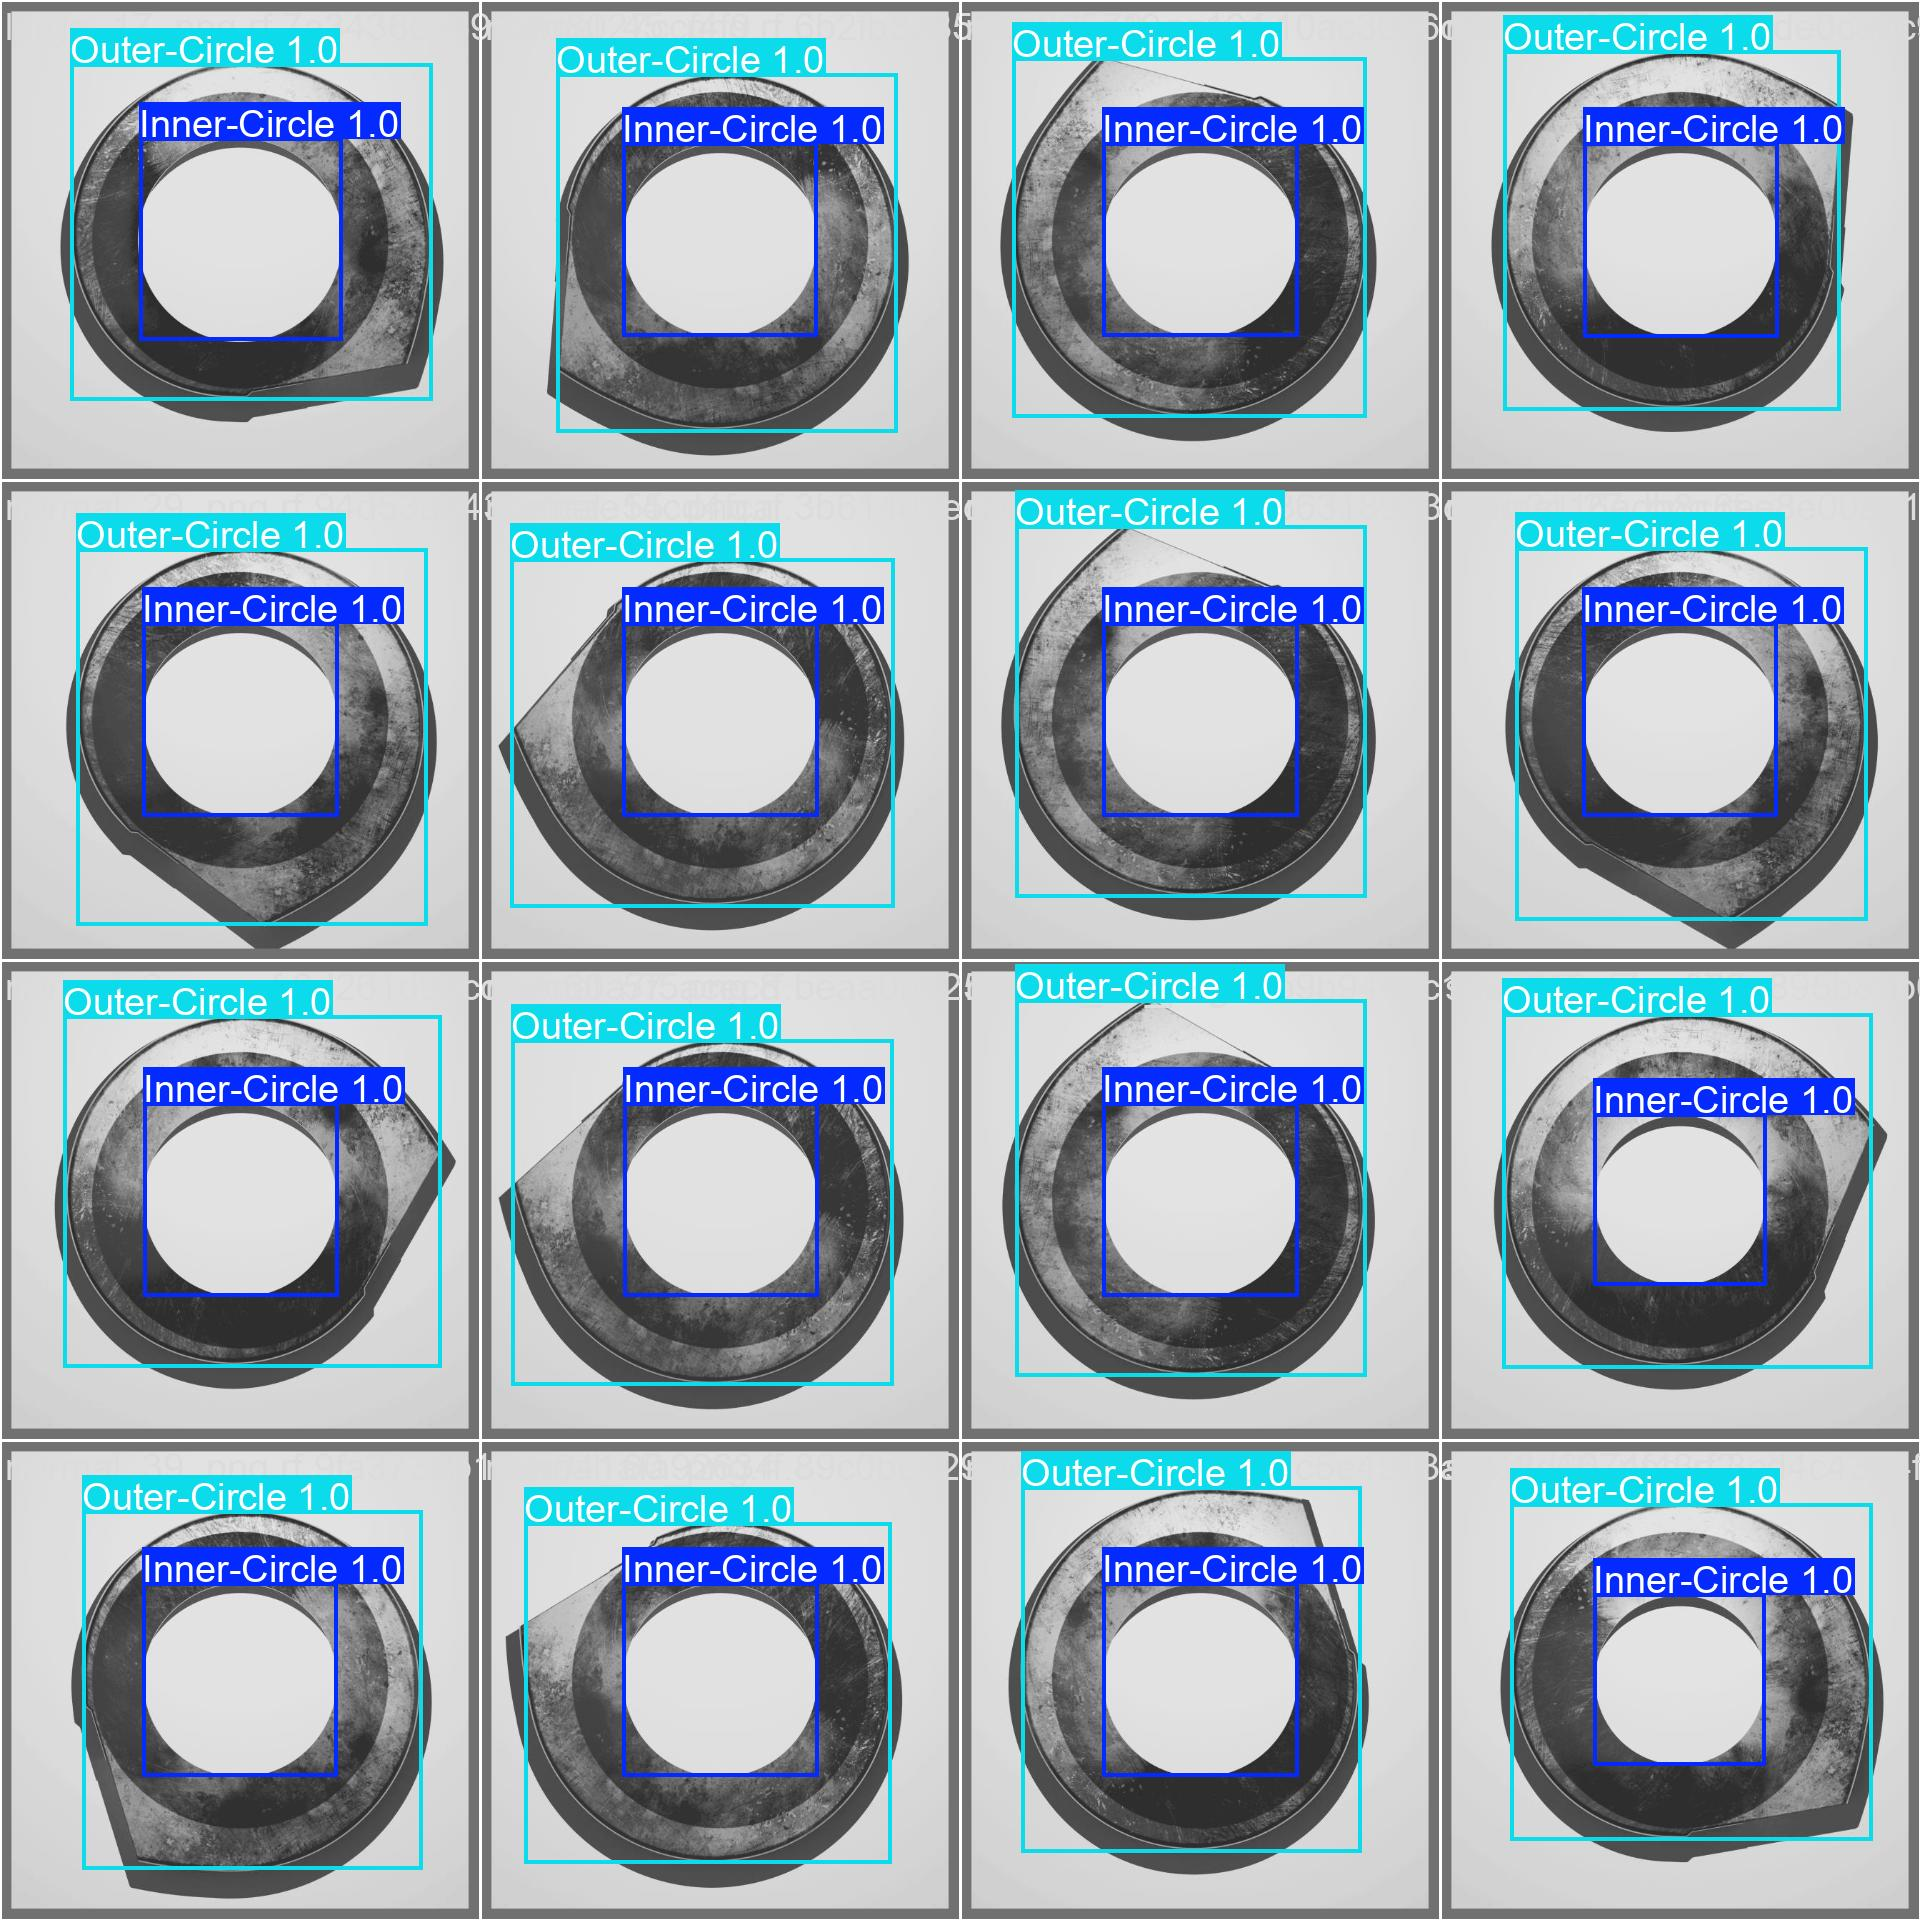

In [17]:
Image(filename= os.path.join(path, images[5]), width=600)

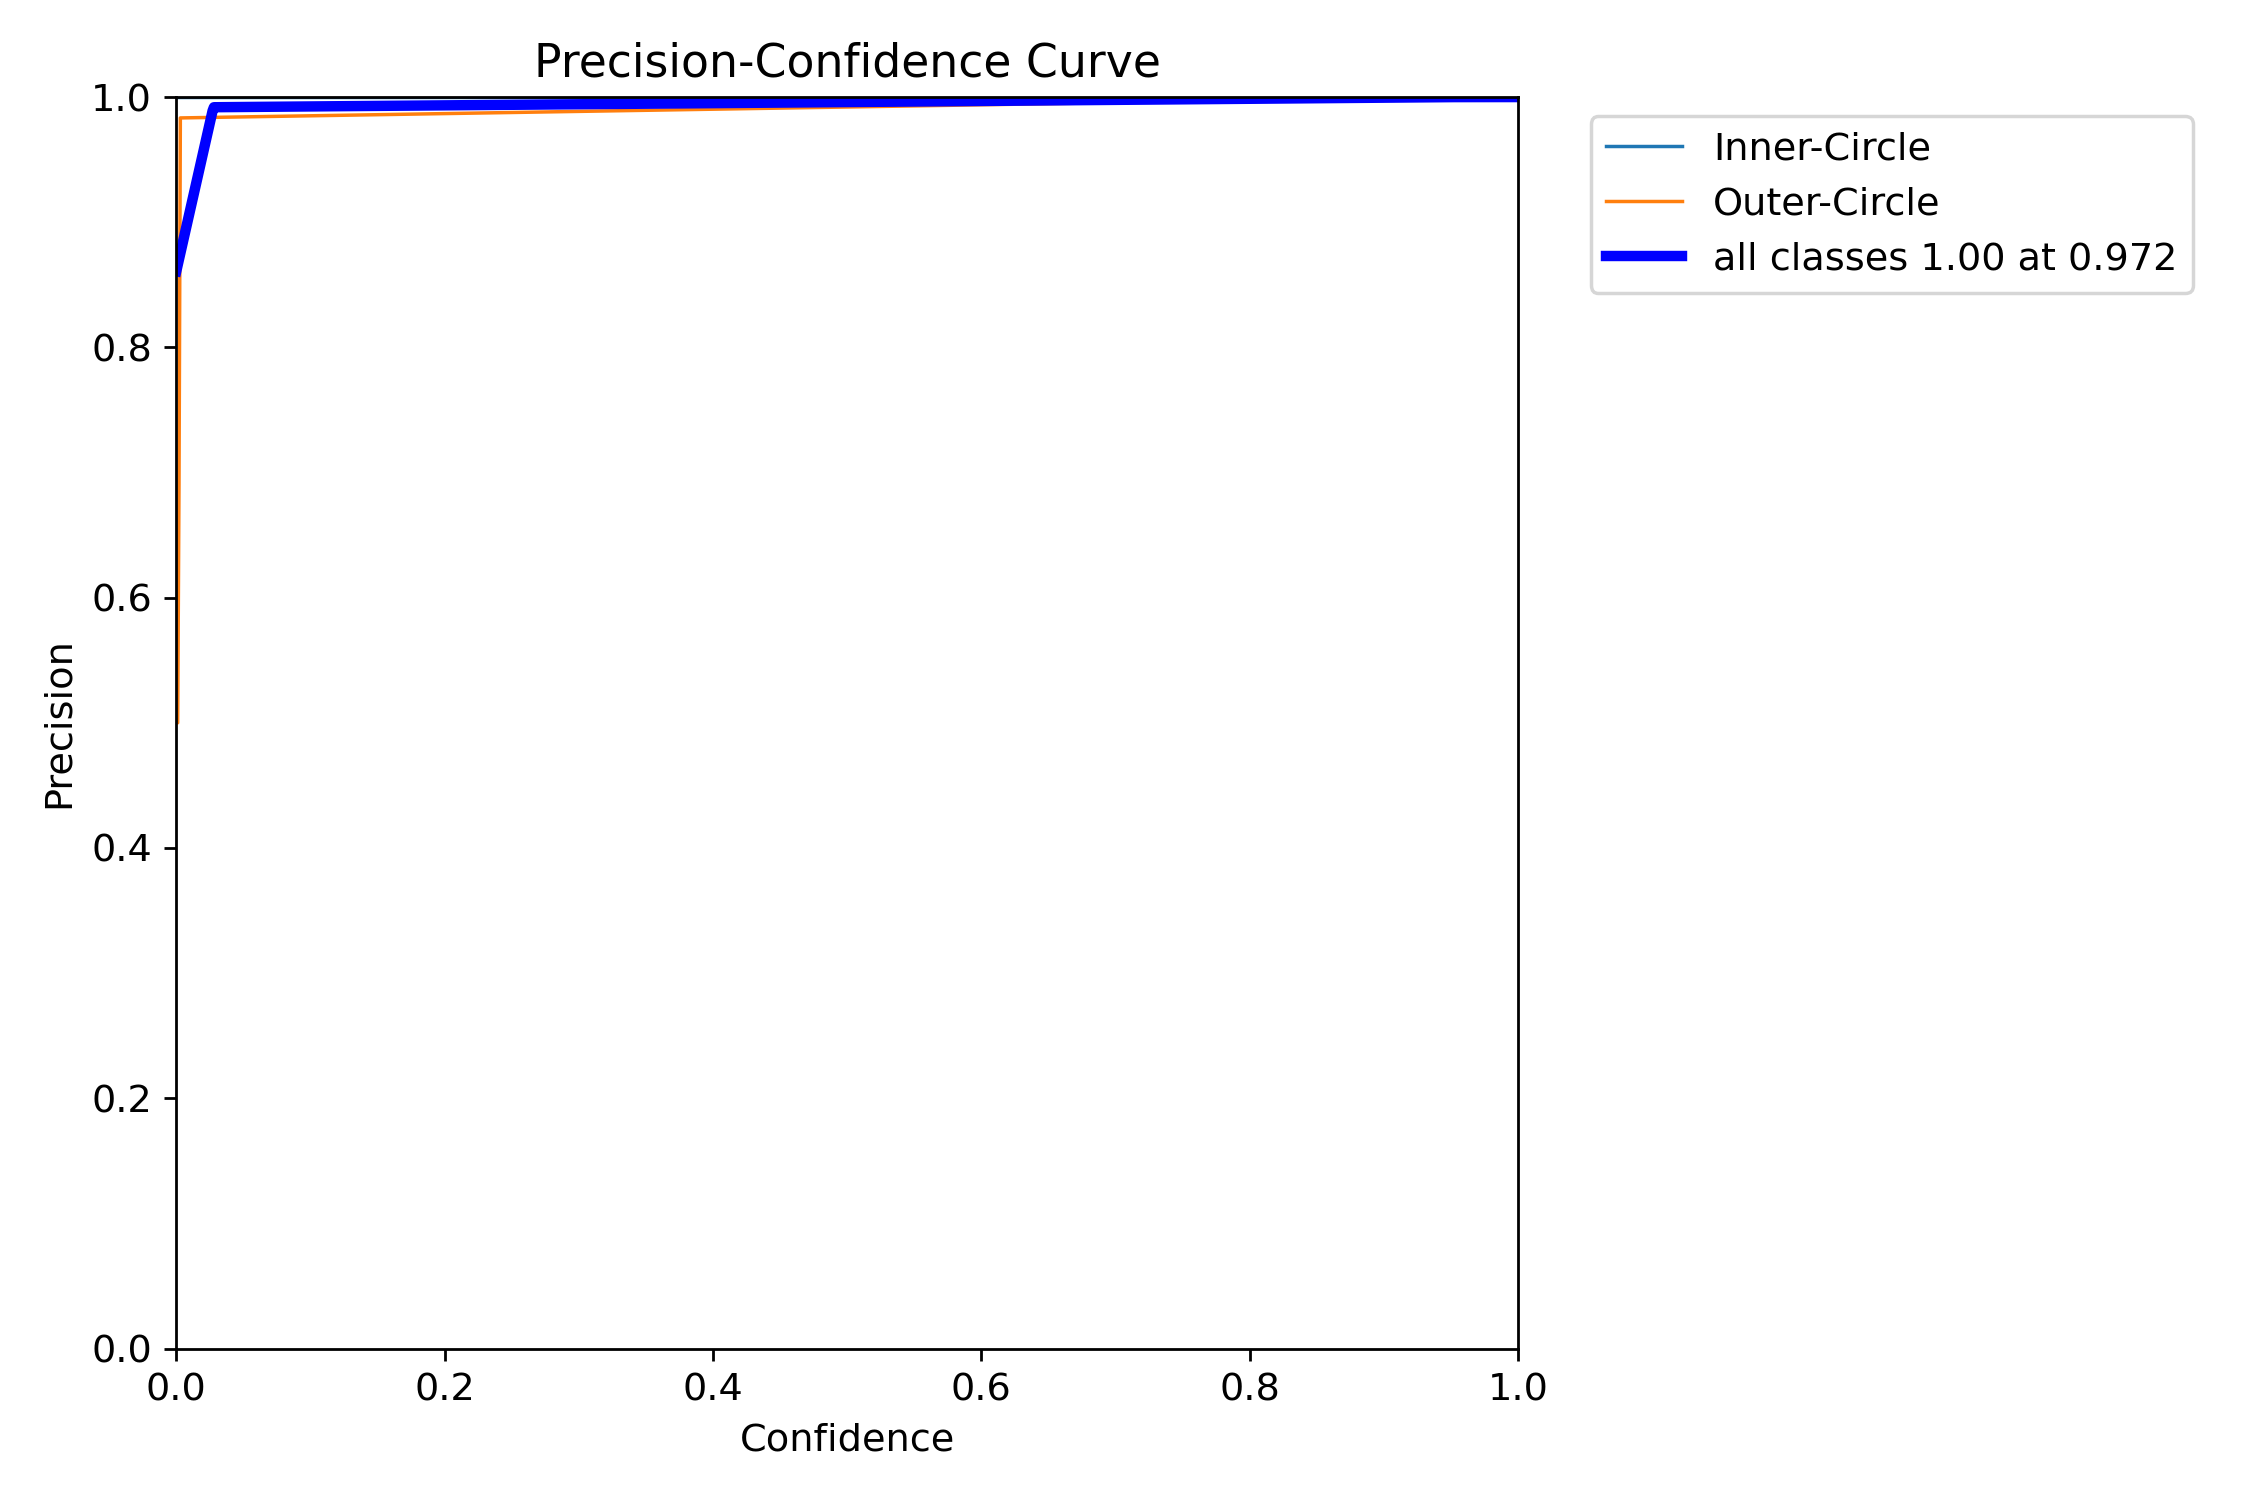

In [18]:
Image(filename= os.path.join(path, images[6]), width=600)

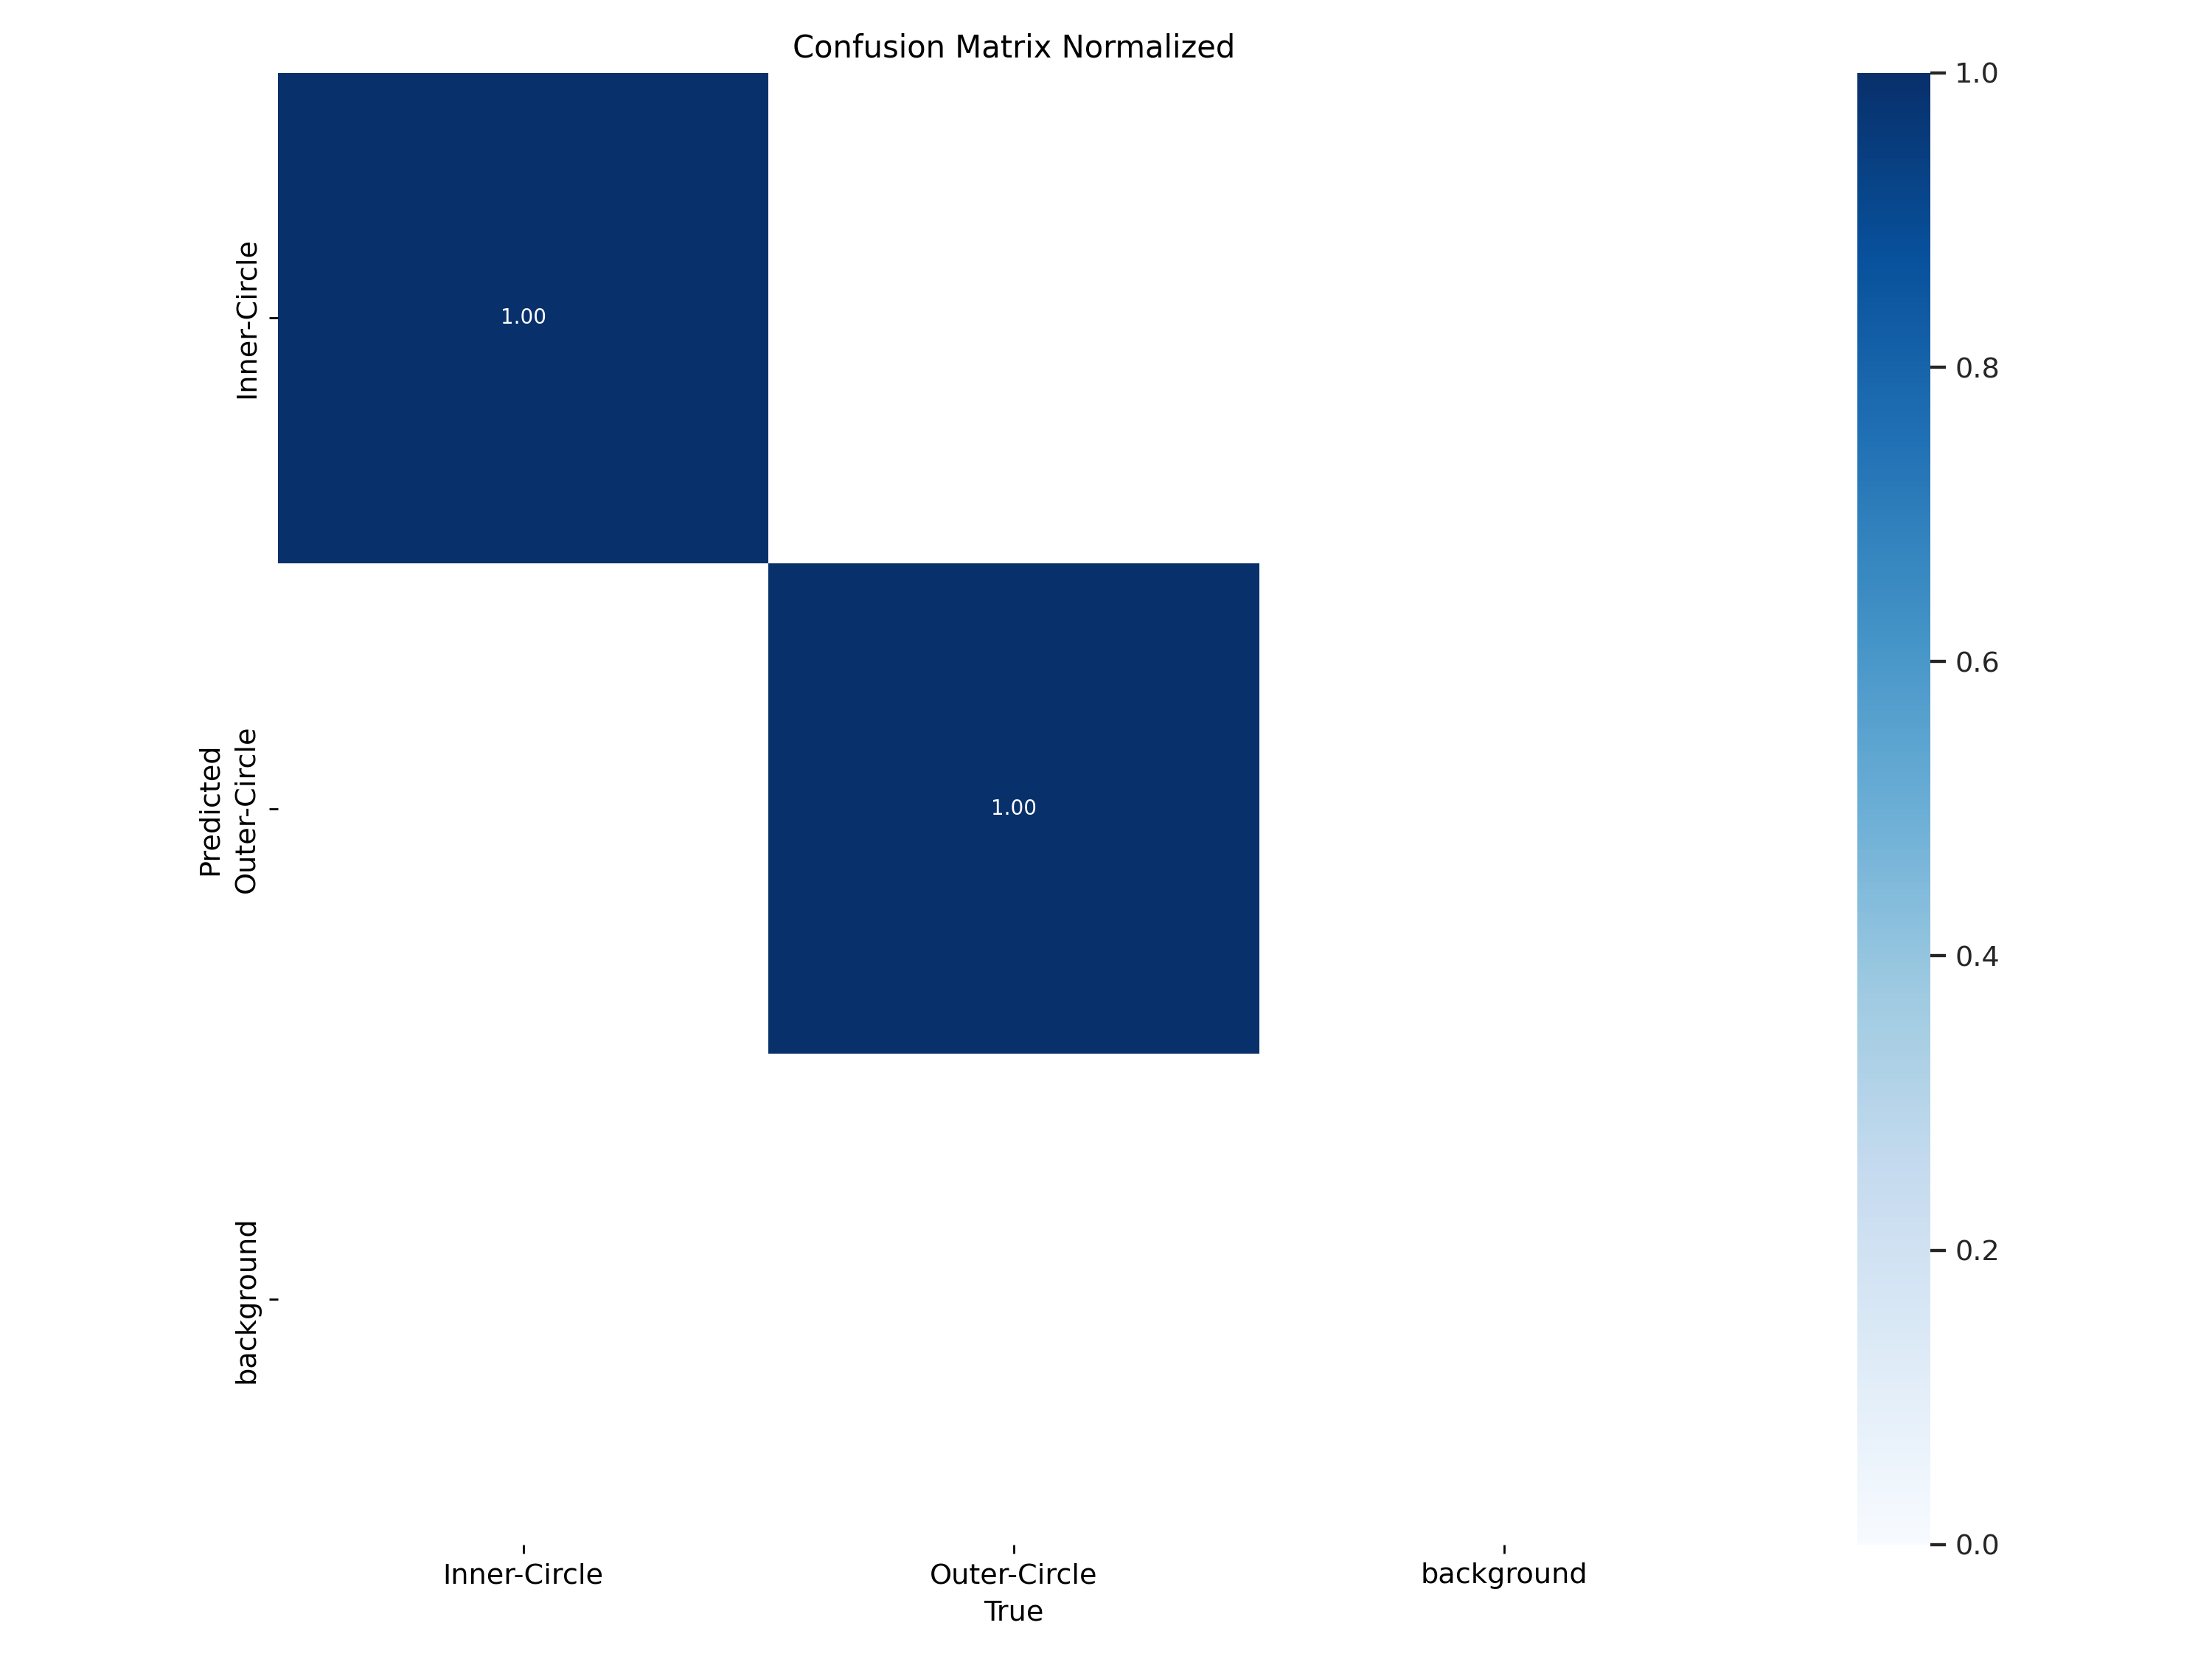

In [19]:
Image(filename= os.path.join(path, images[7]), width=600)

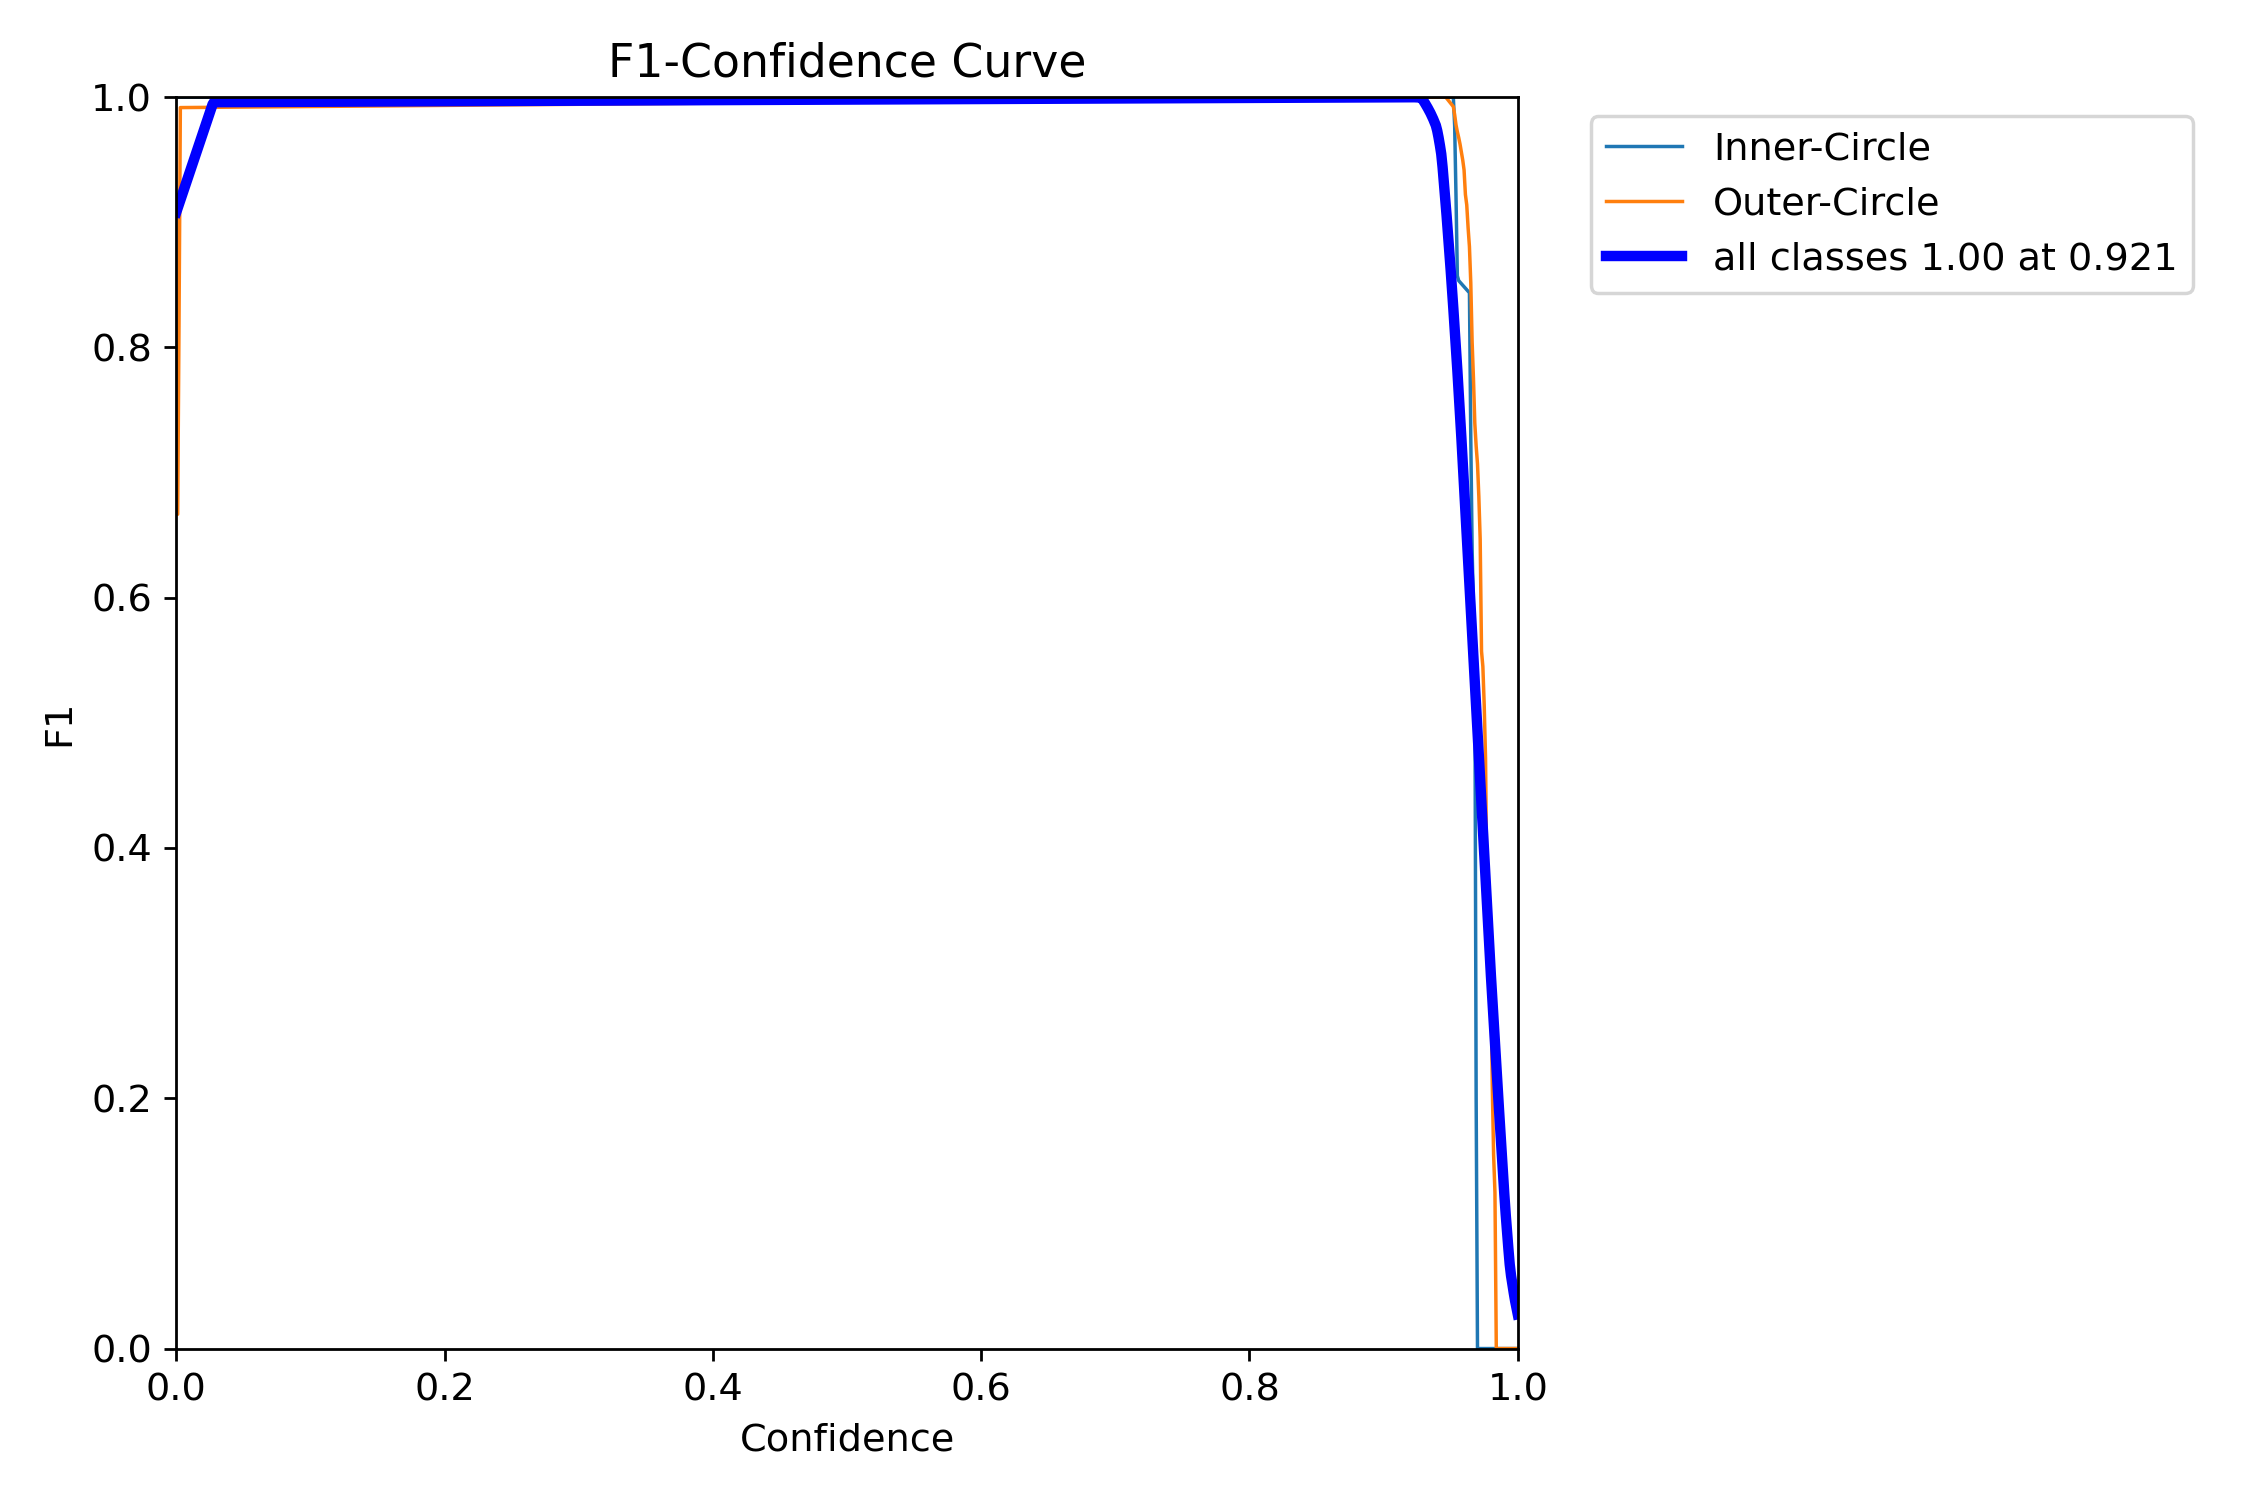

In [20]:
Image(filename= os.path.join(path, images[8]), width=600)

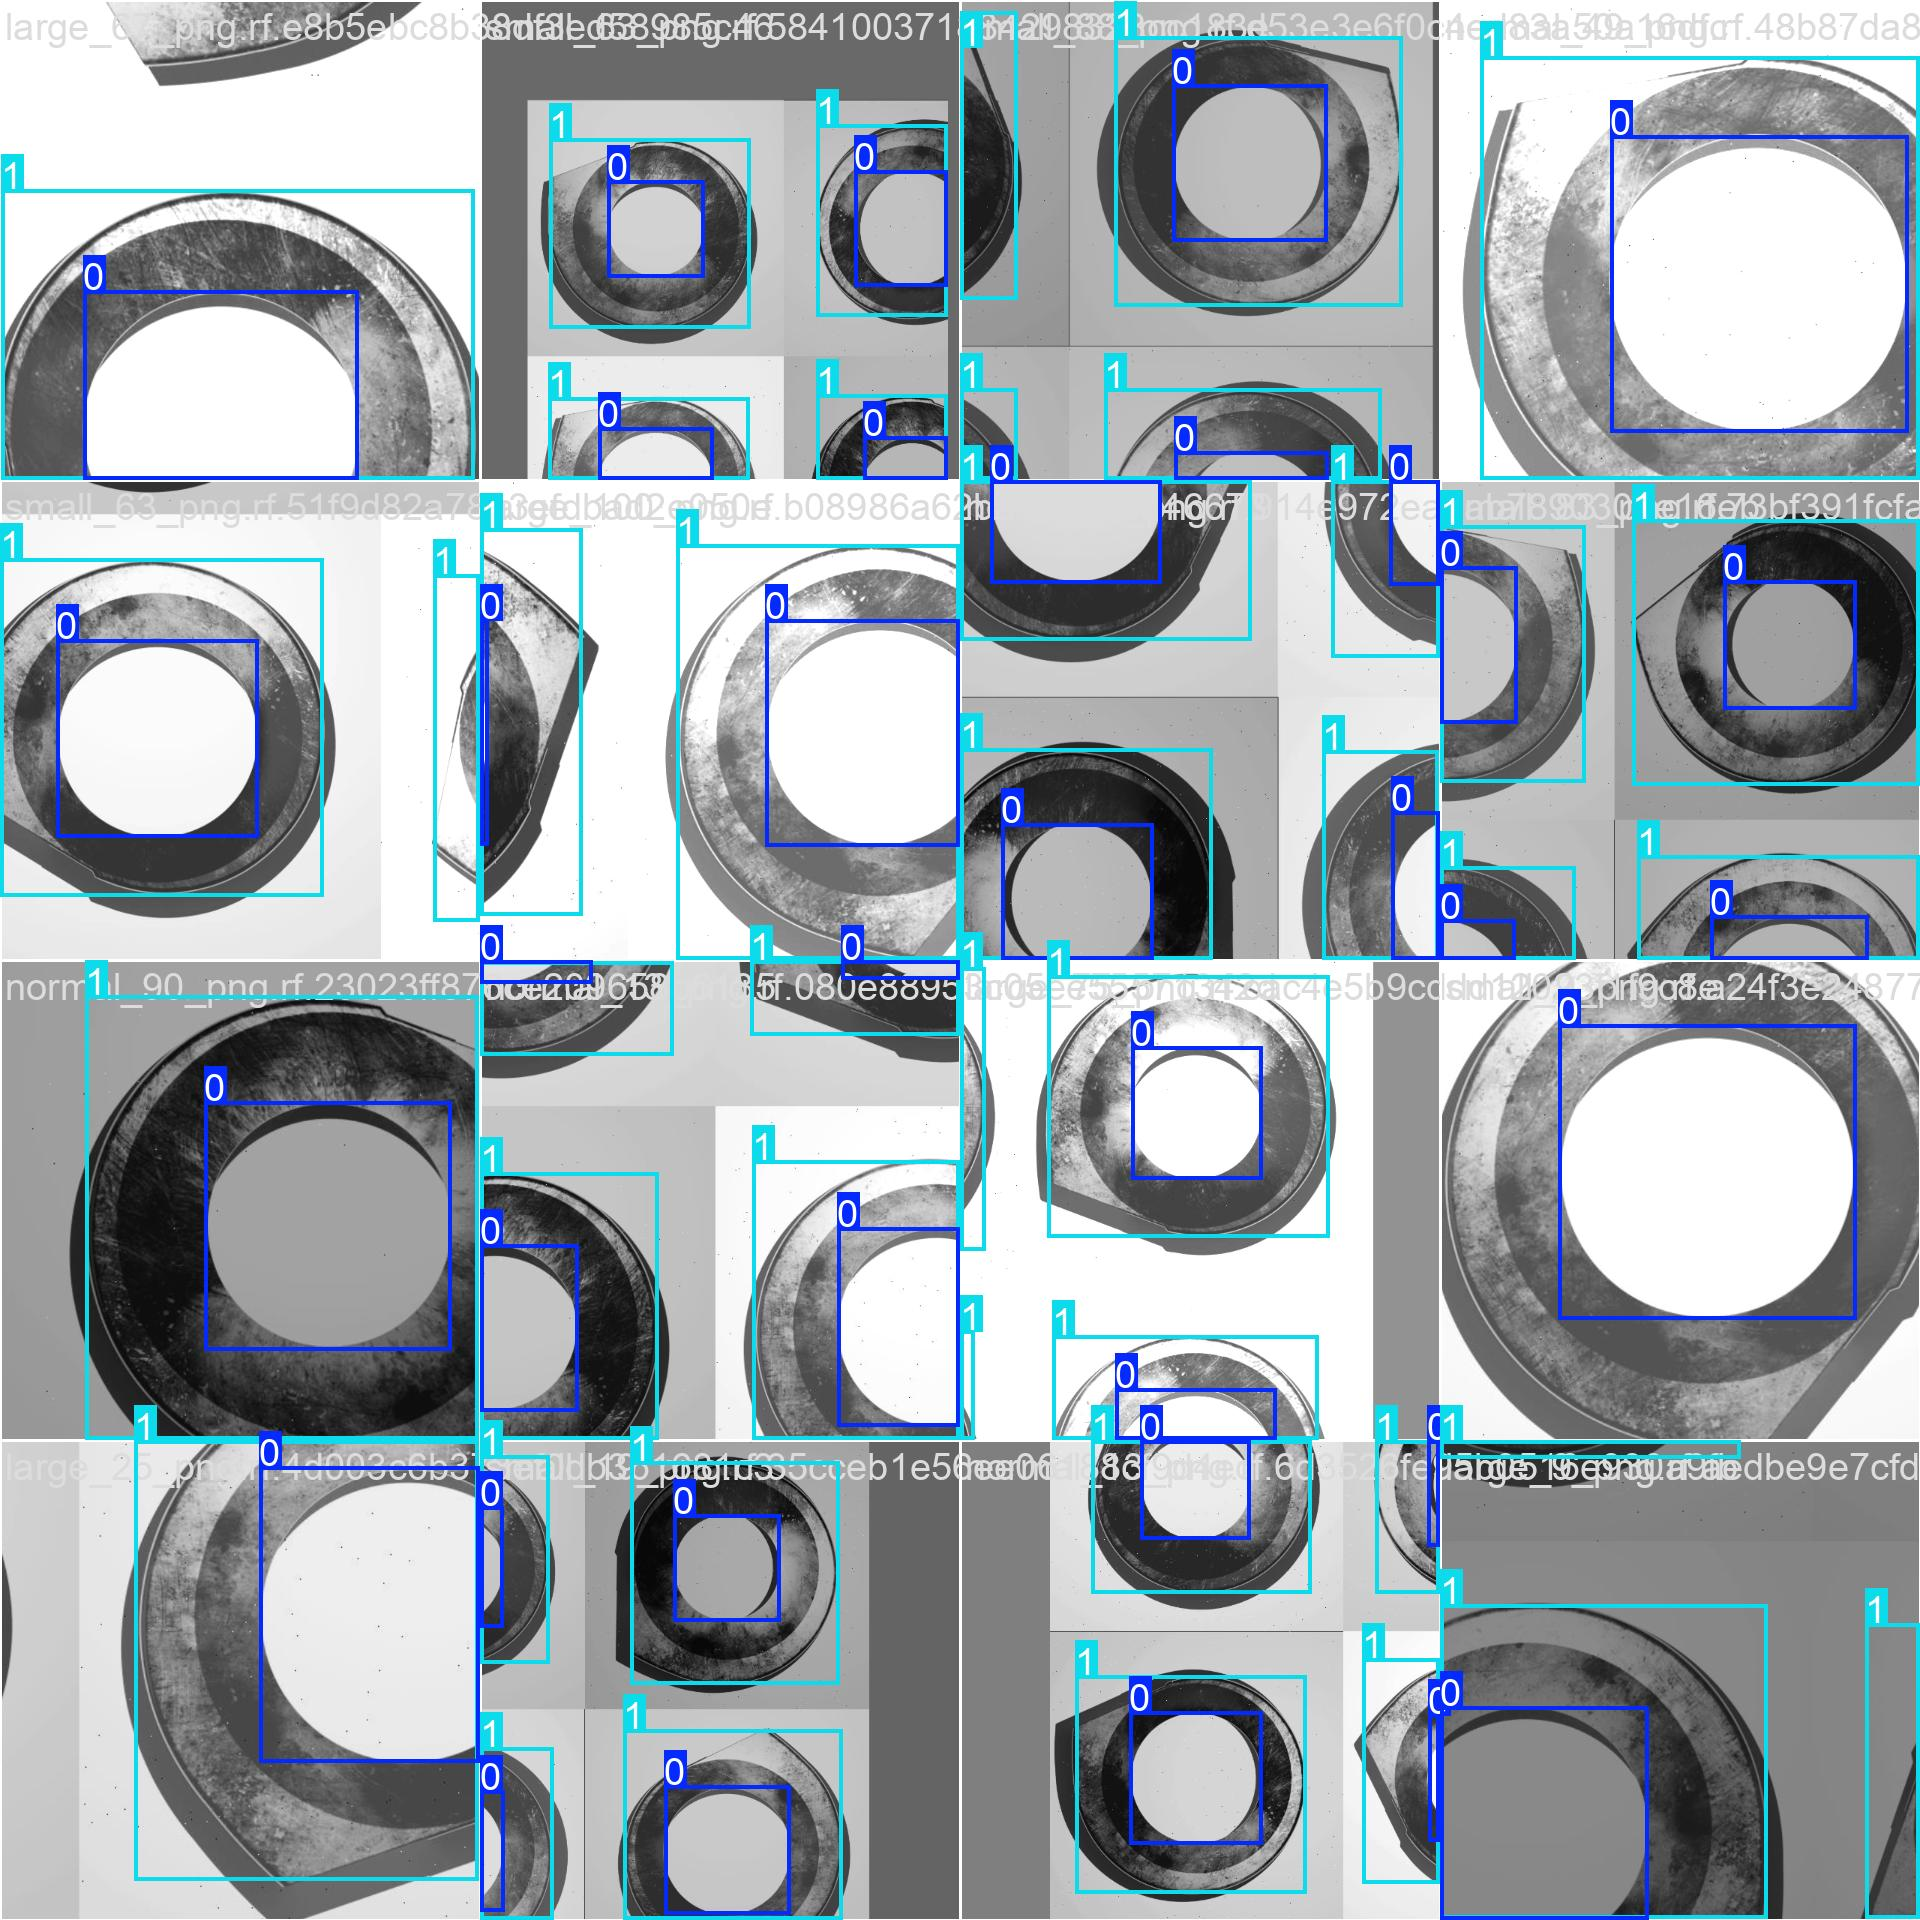

In [21]:
Image(filename= os.path.join(path, images[9]), width=600)

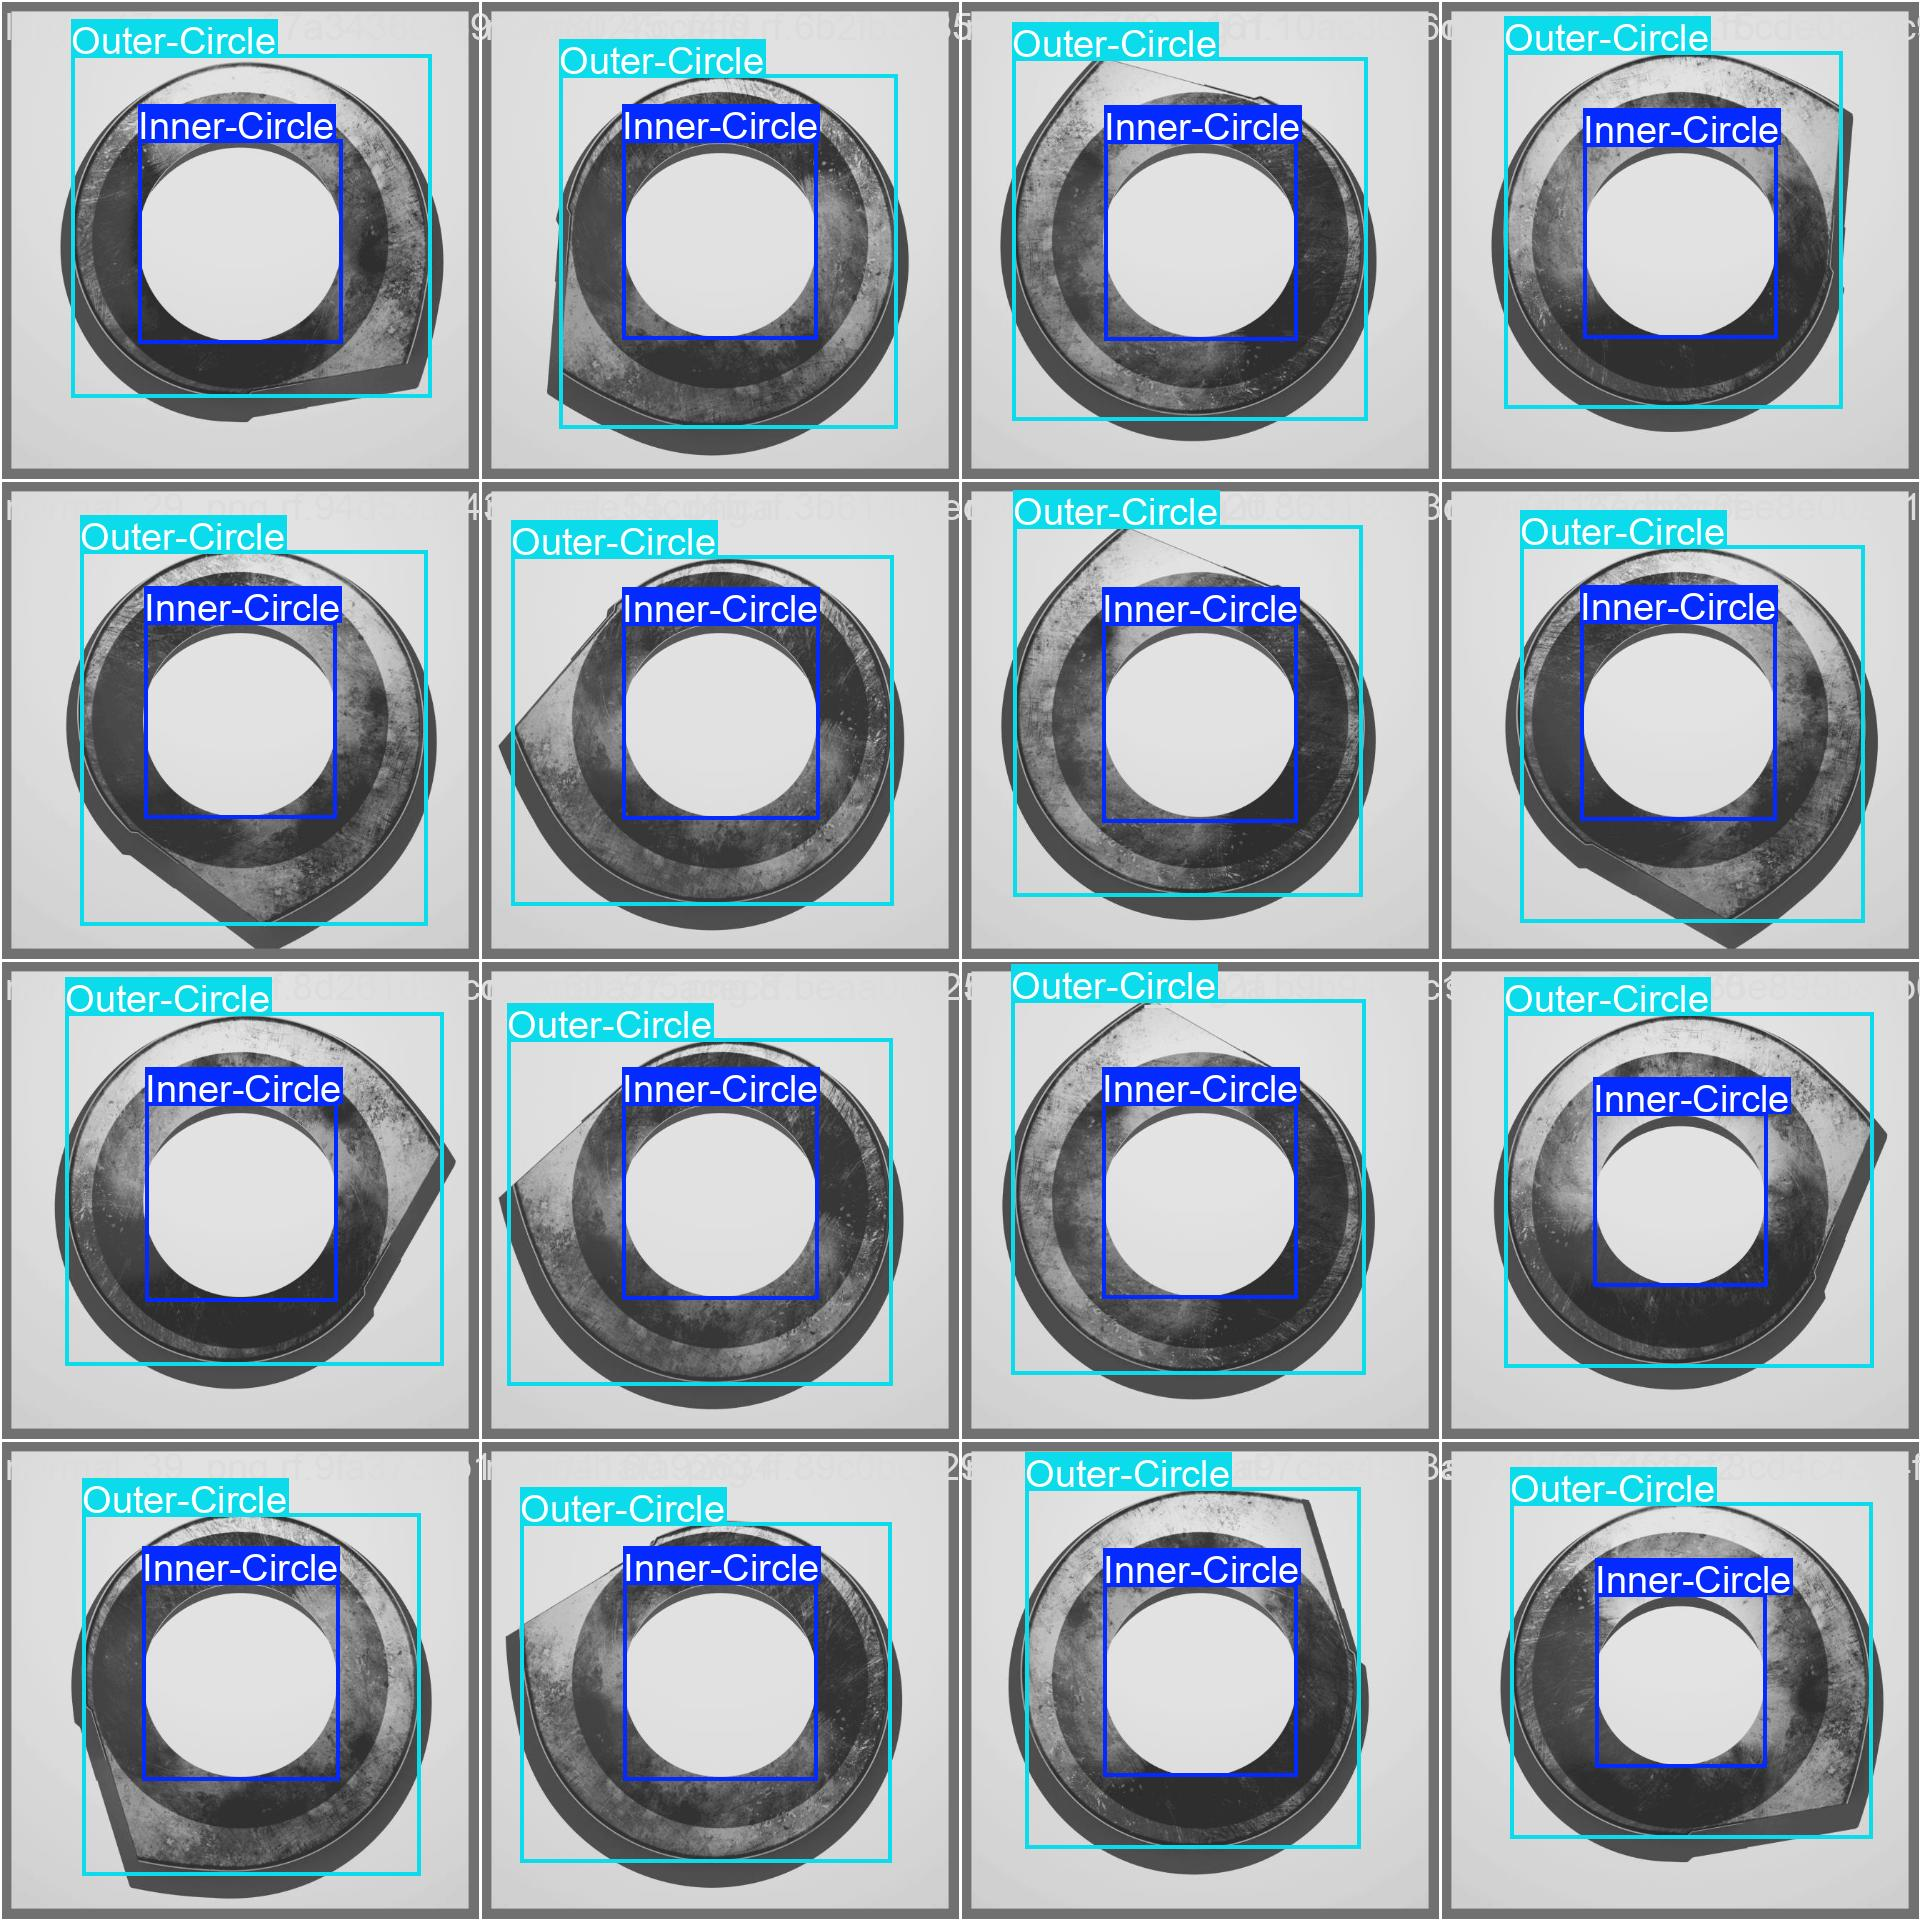

In [22]:
Image(filename= os.path.join(path, images[10]), width=600)

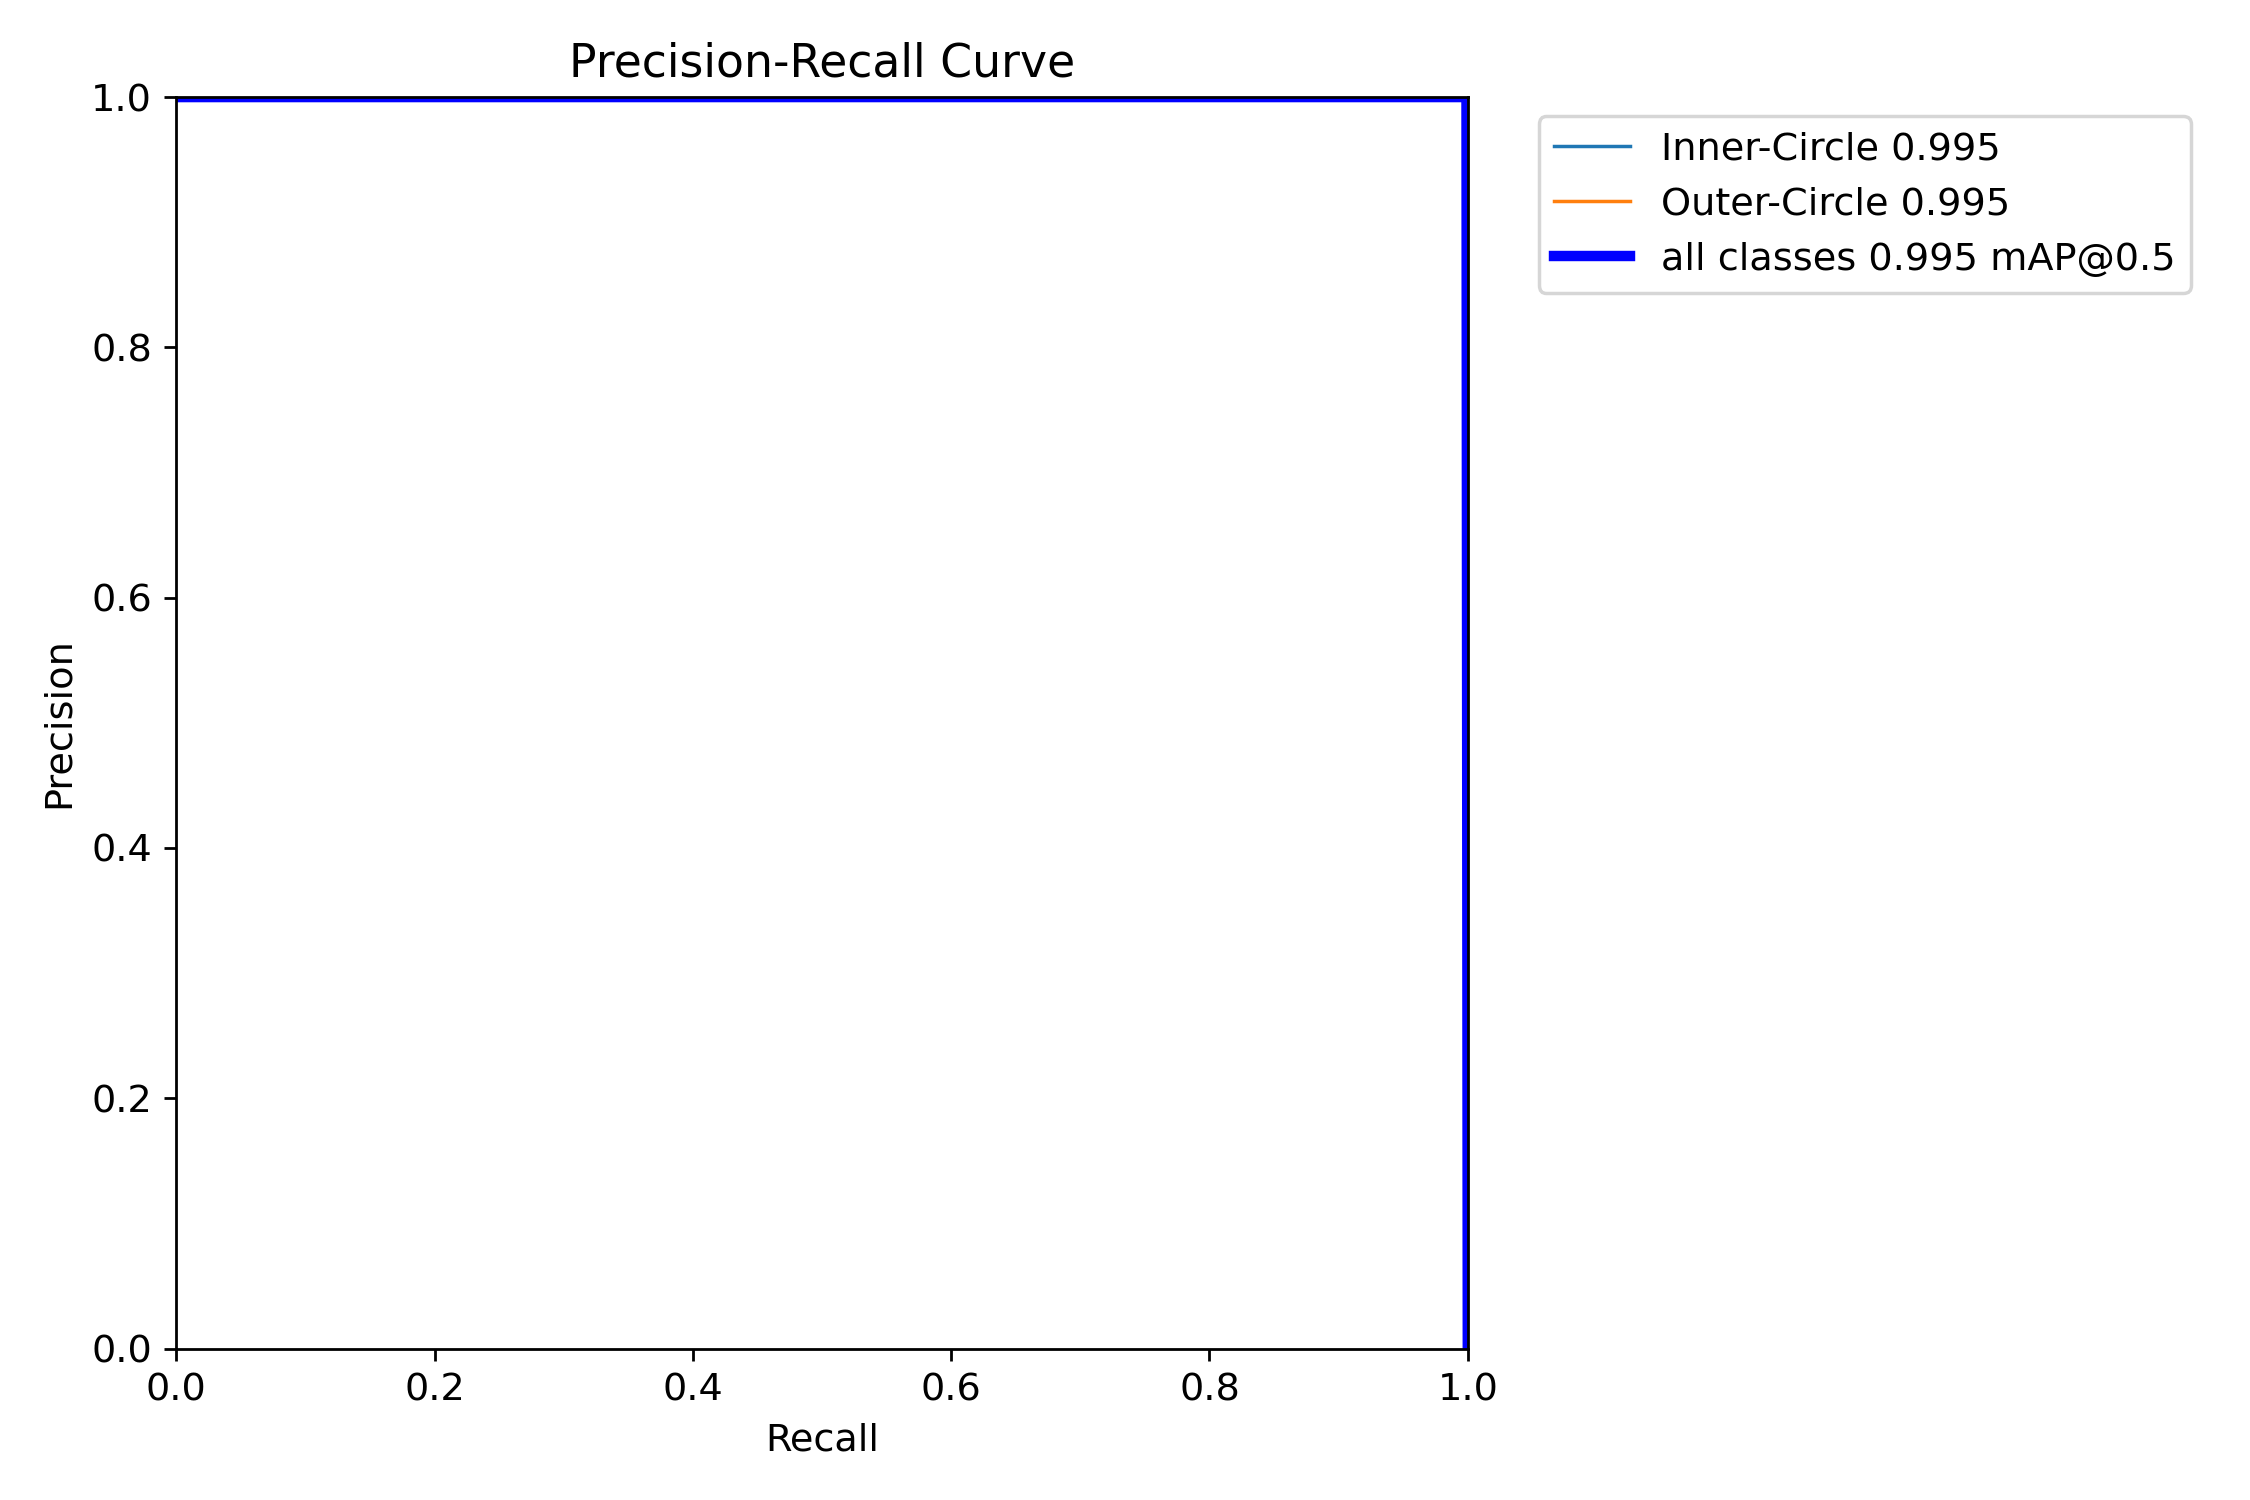

In [23]:
Image(filename= os.path.join(path, images[11]), width=600)

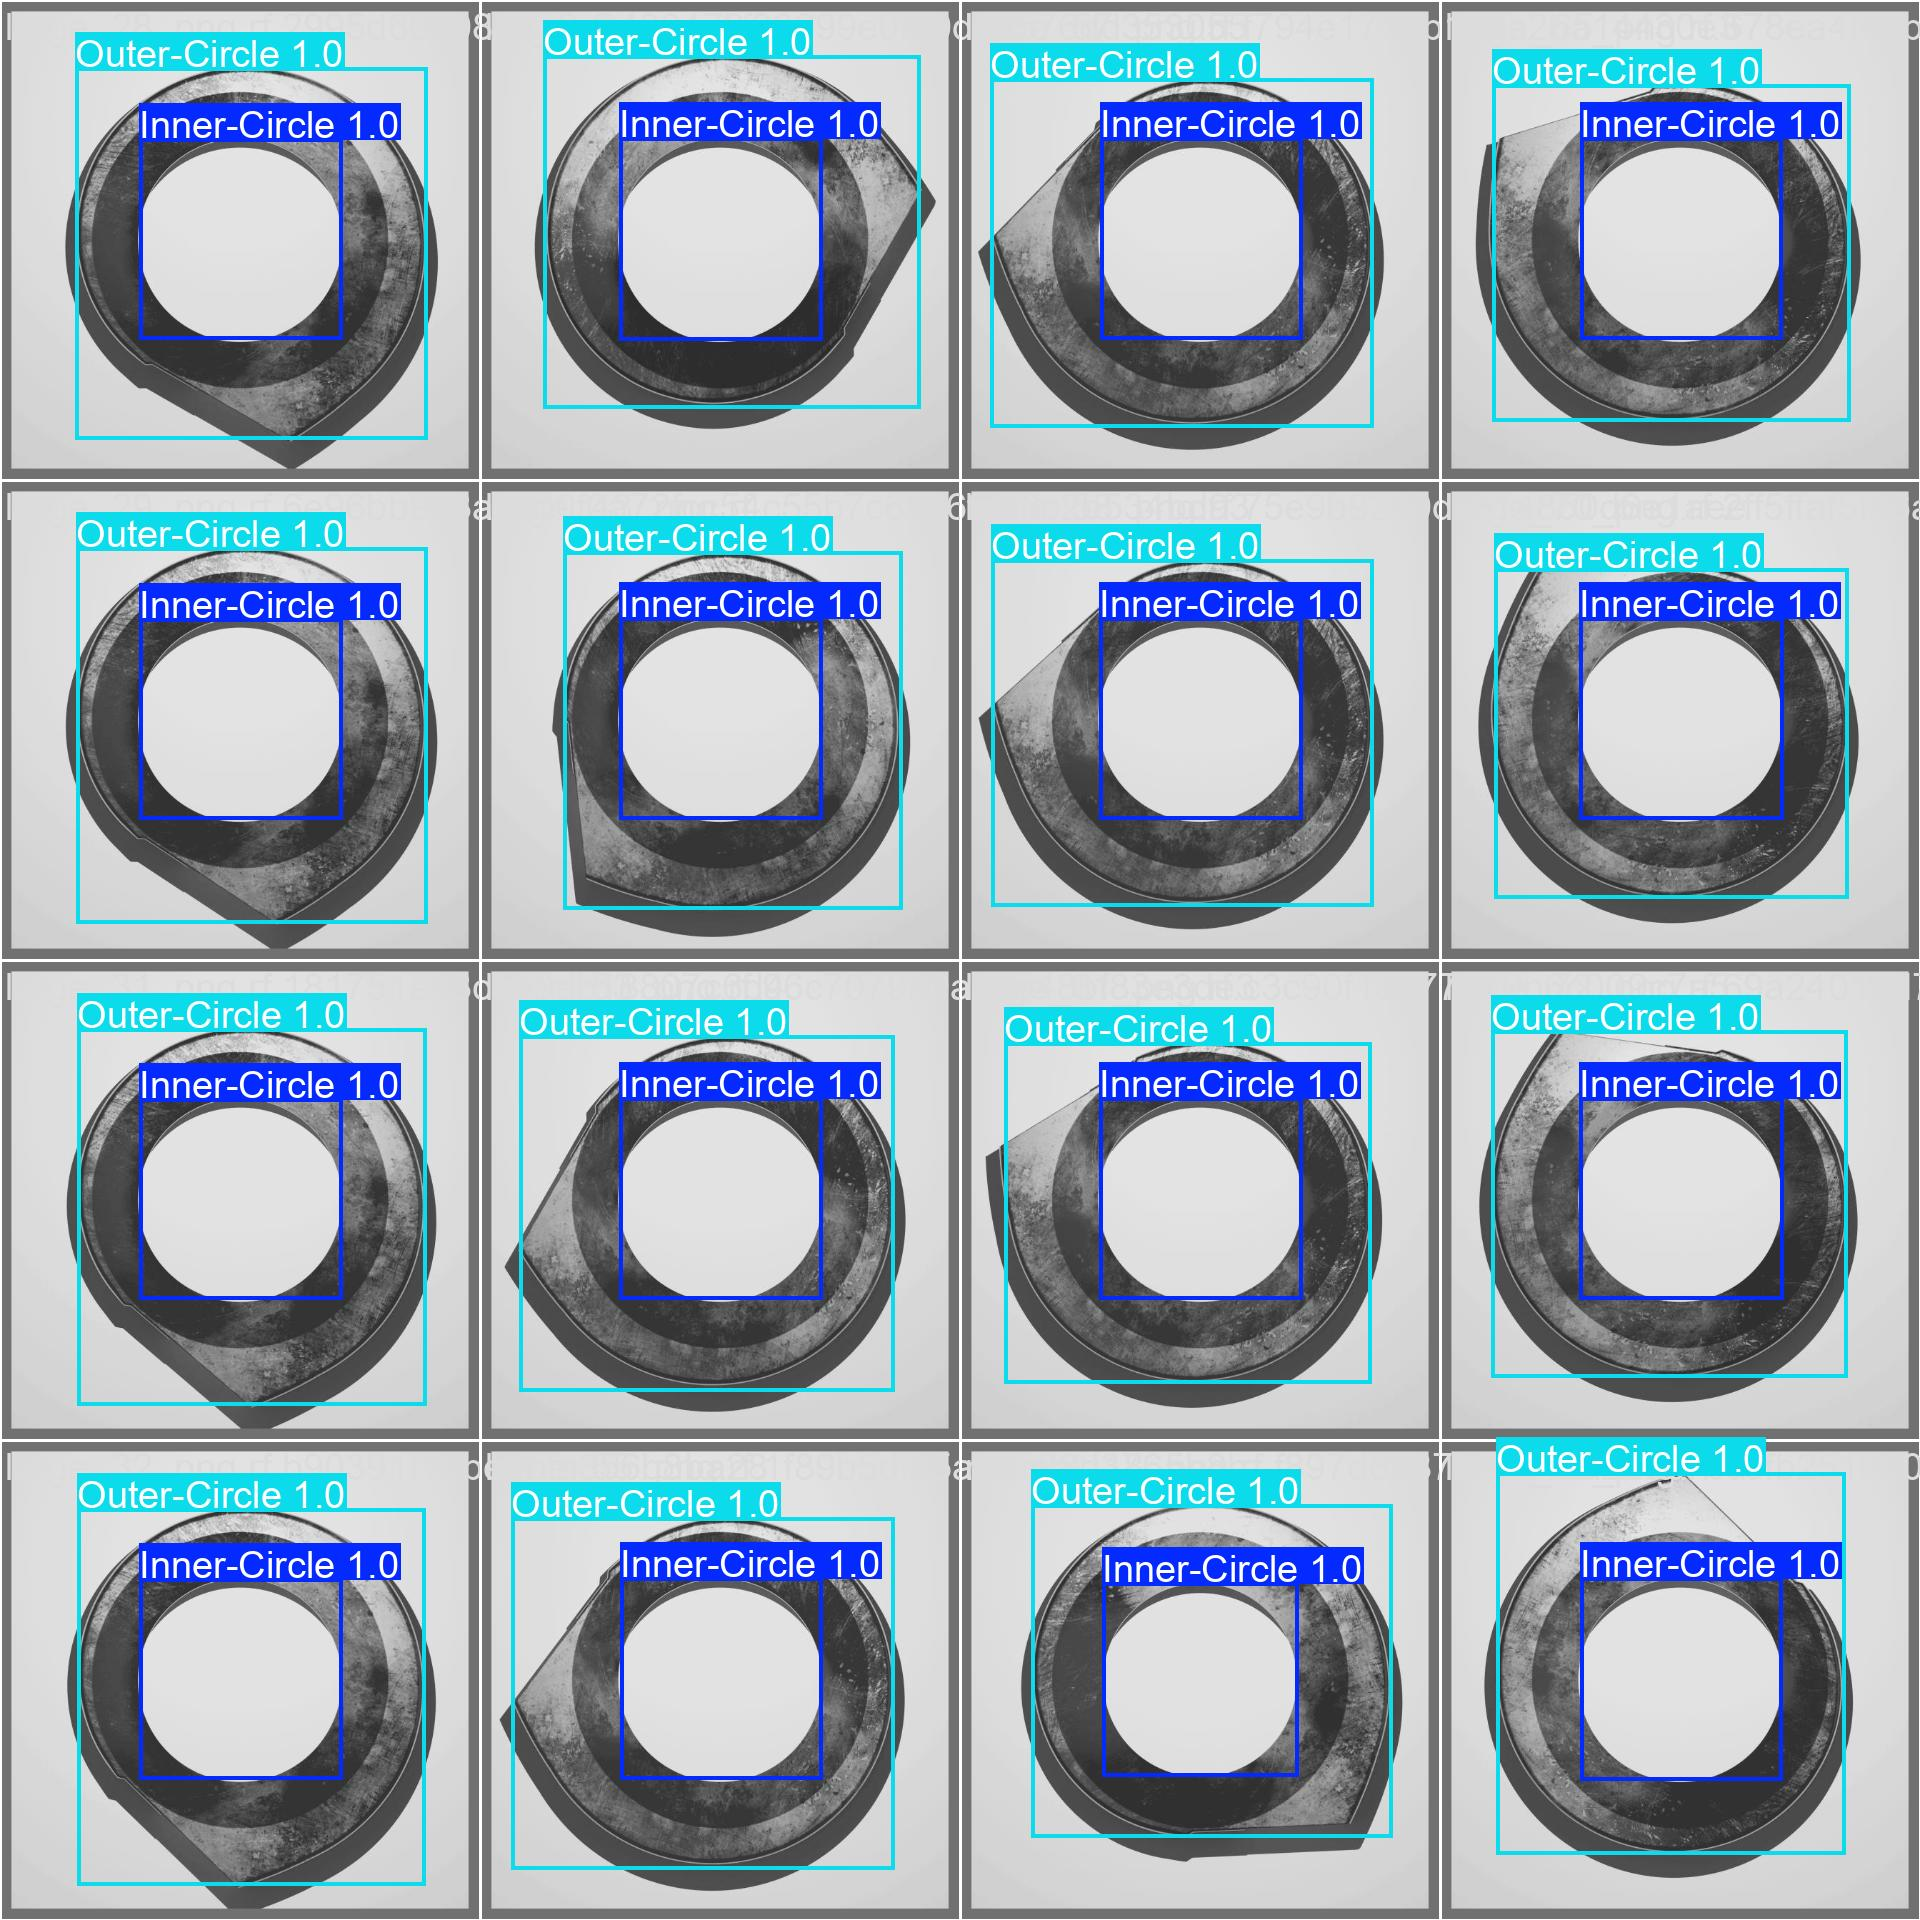

In [24]:
Image(filename= os.path.join(path, images[14]), width=600)

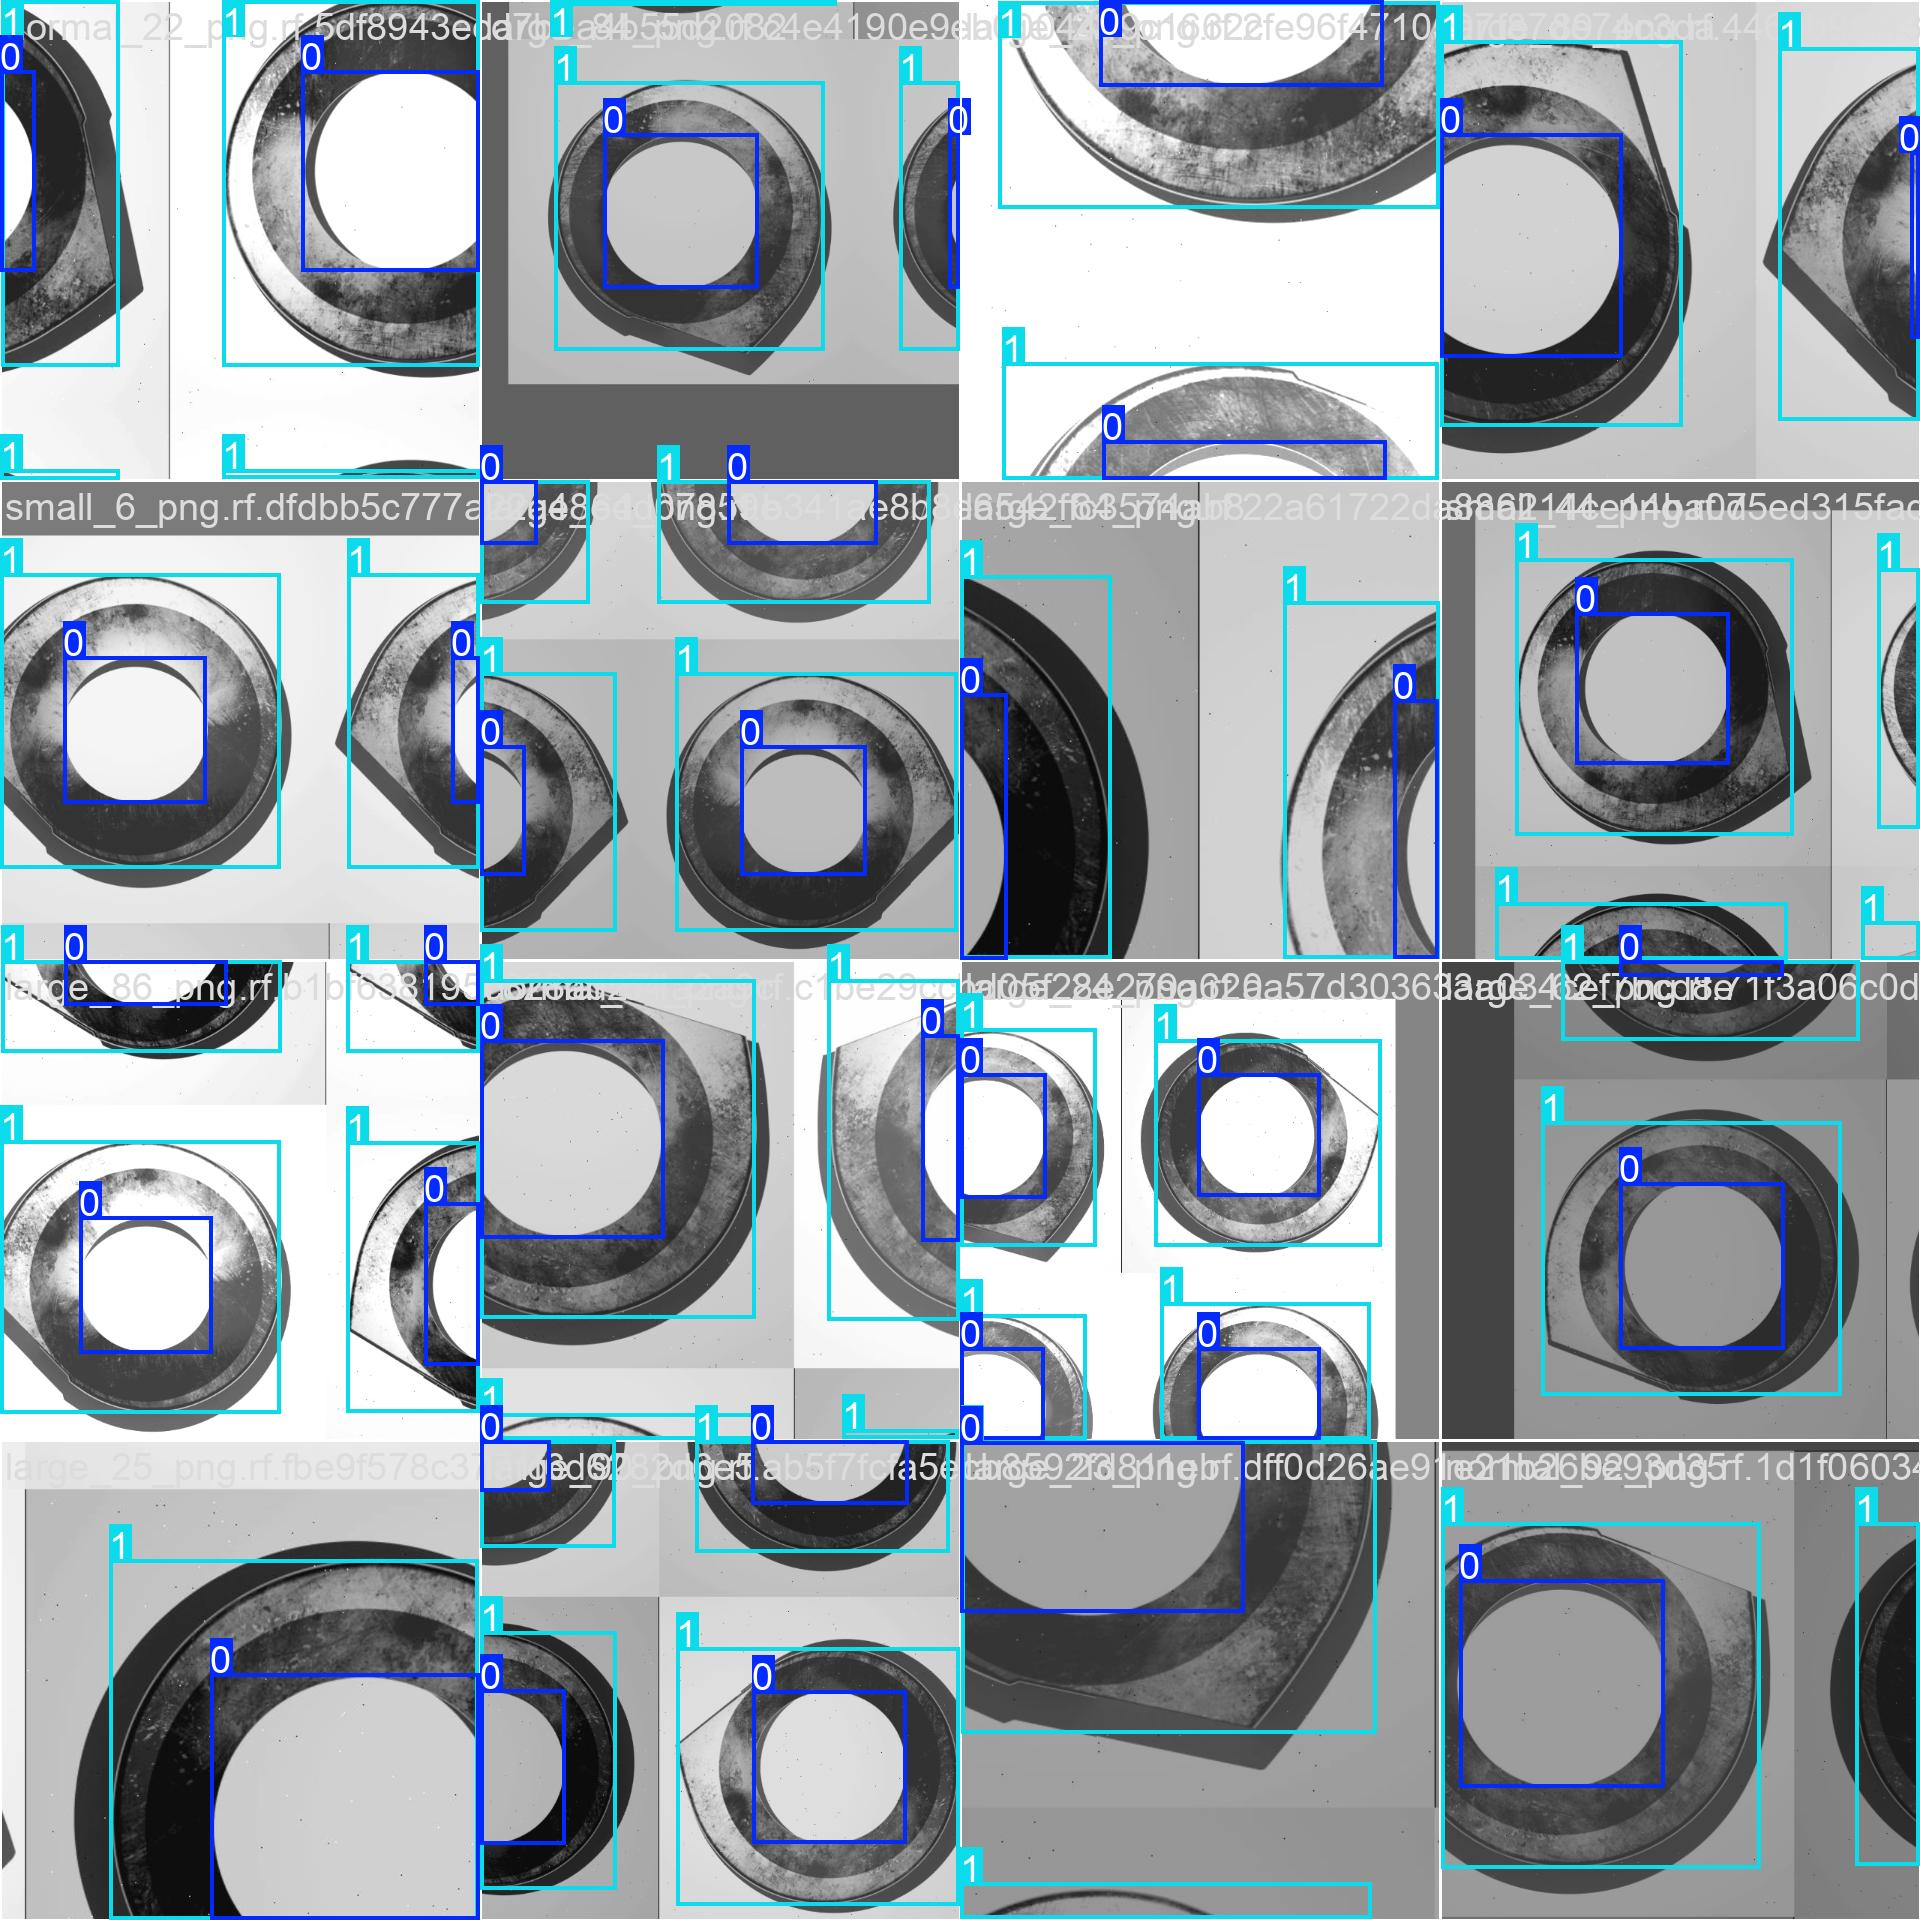

In [25]:
Image(filename= os.path.join(path, images[15]), width=600)

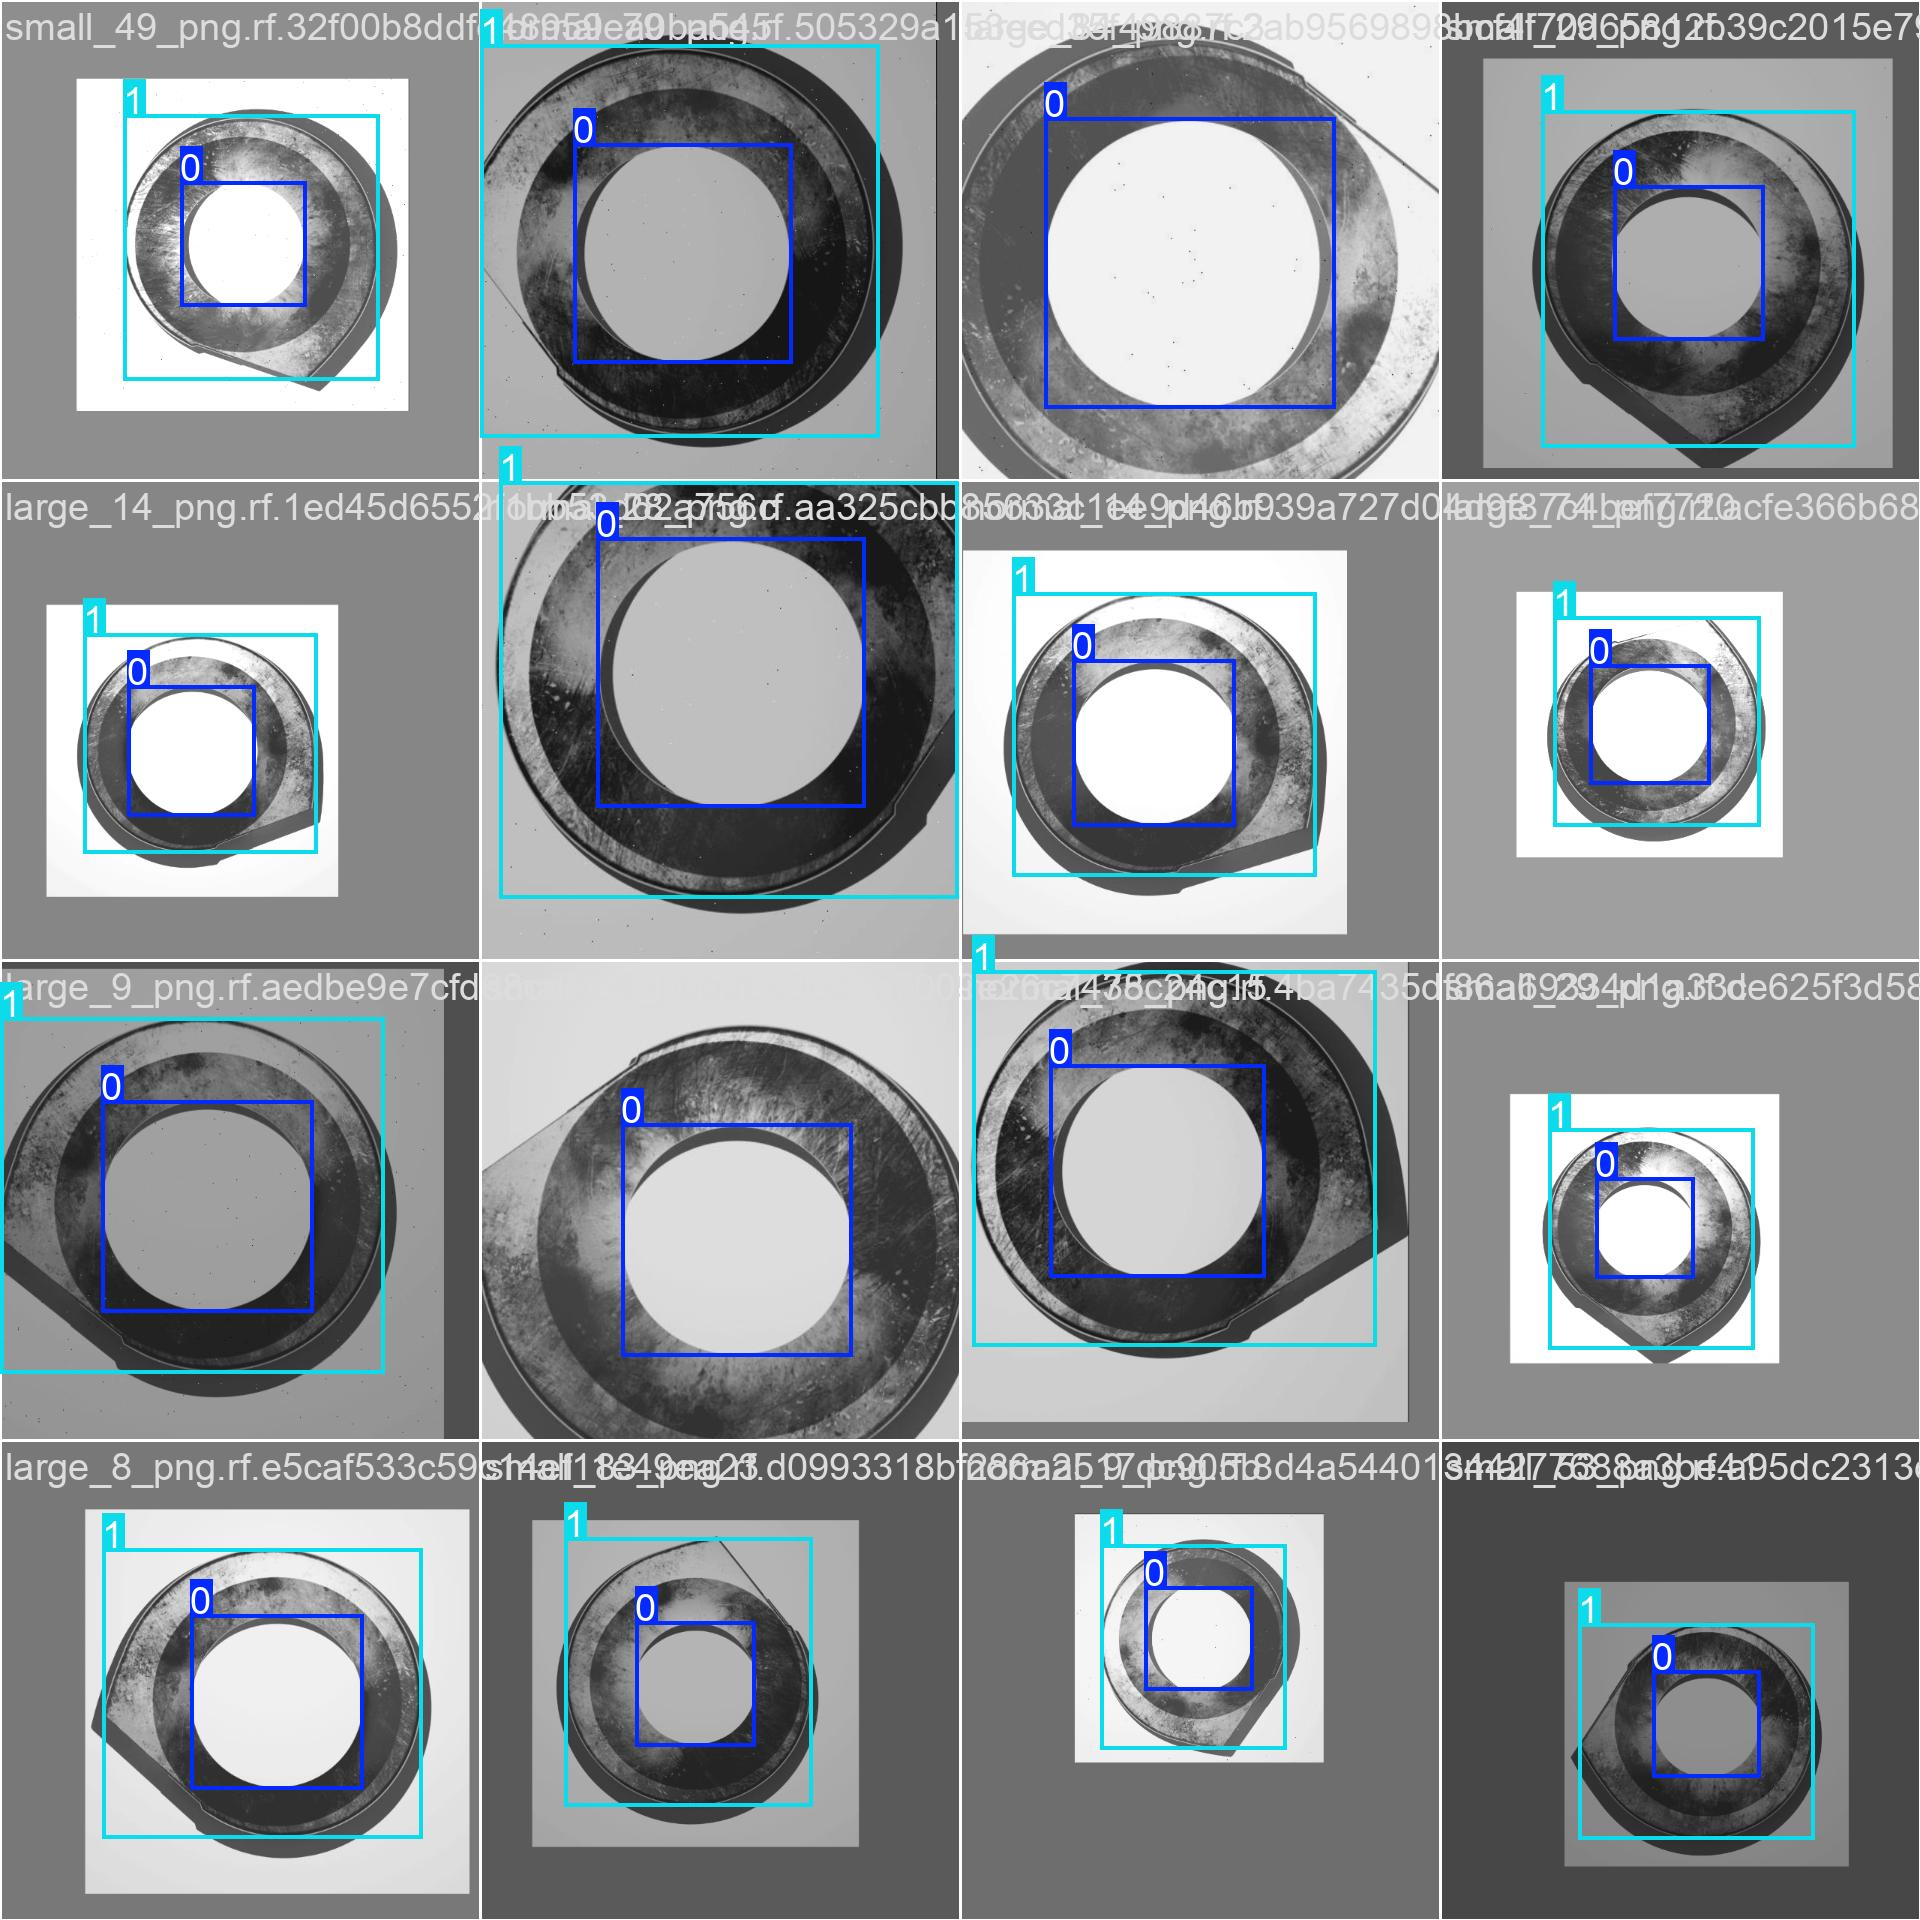

In [26]:
Image(filename= os.path.join(path, images[16]), width=600)

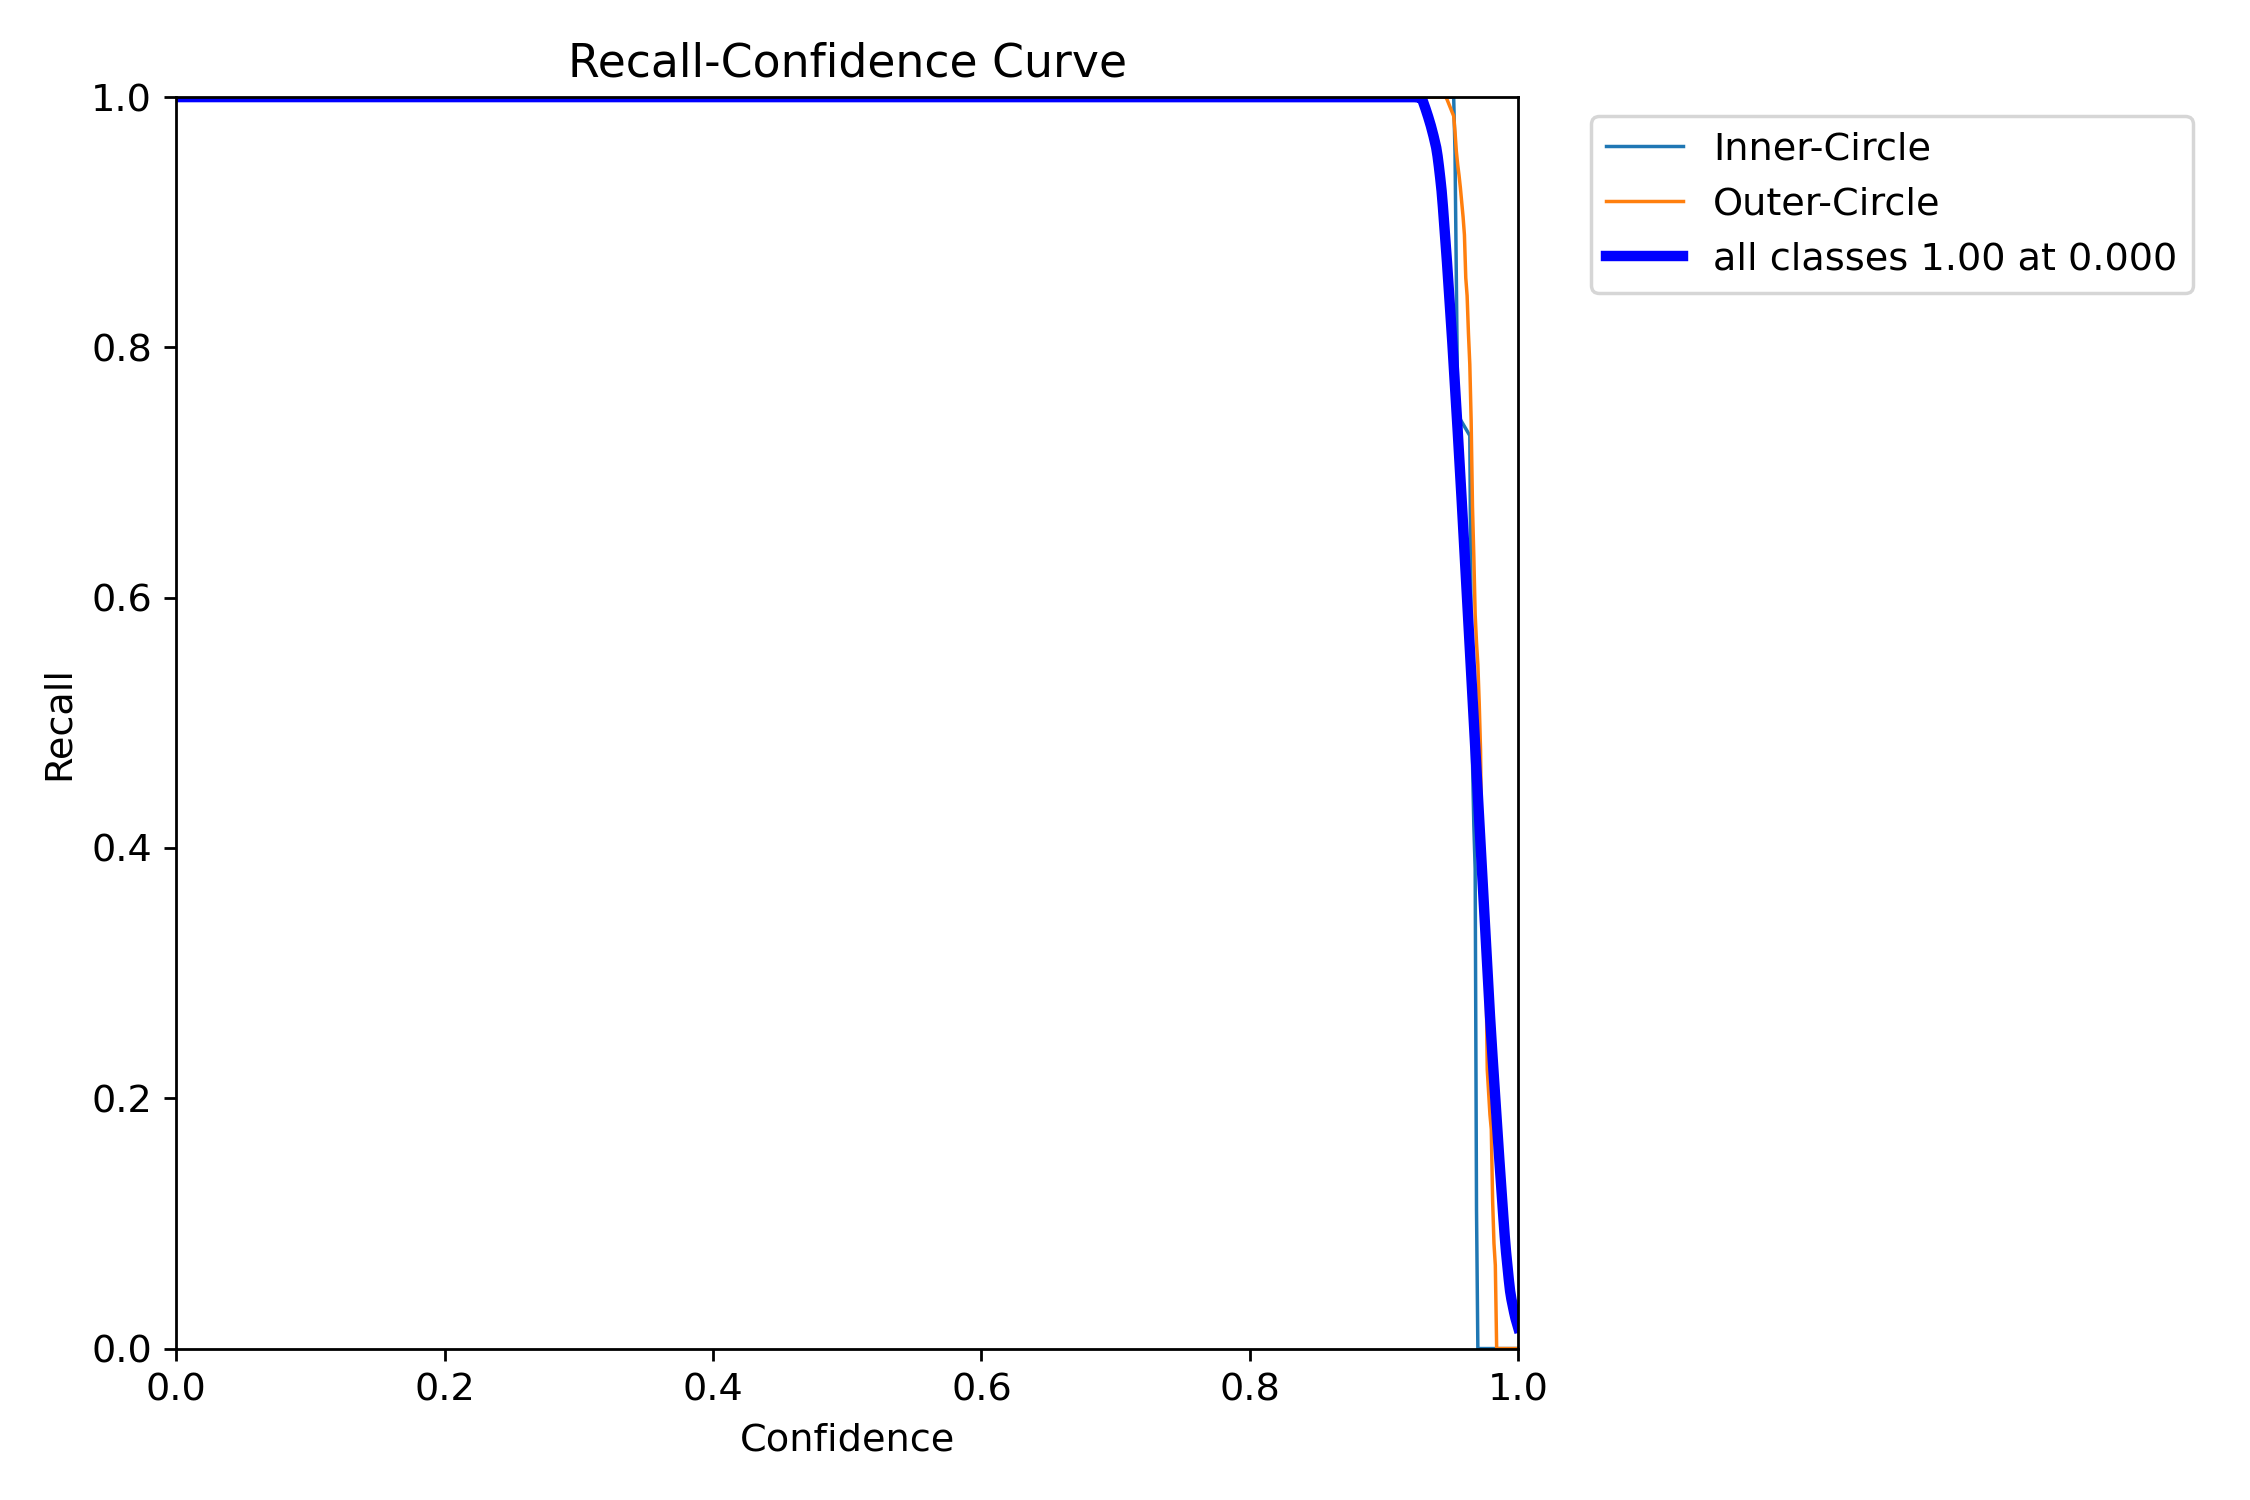

In [27]:
Image(filename= os.path.join(path, images[17]), width=600)

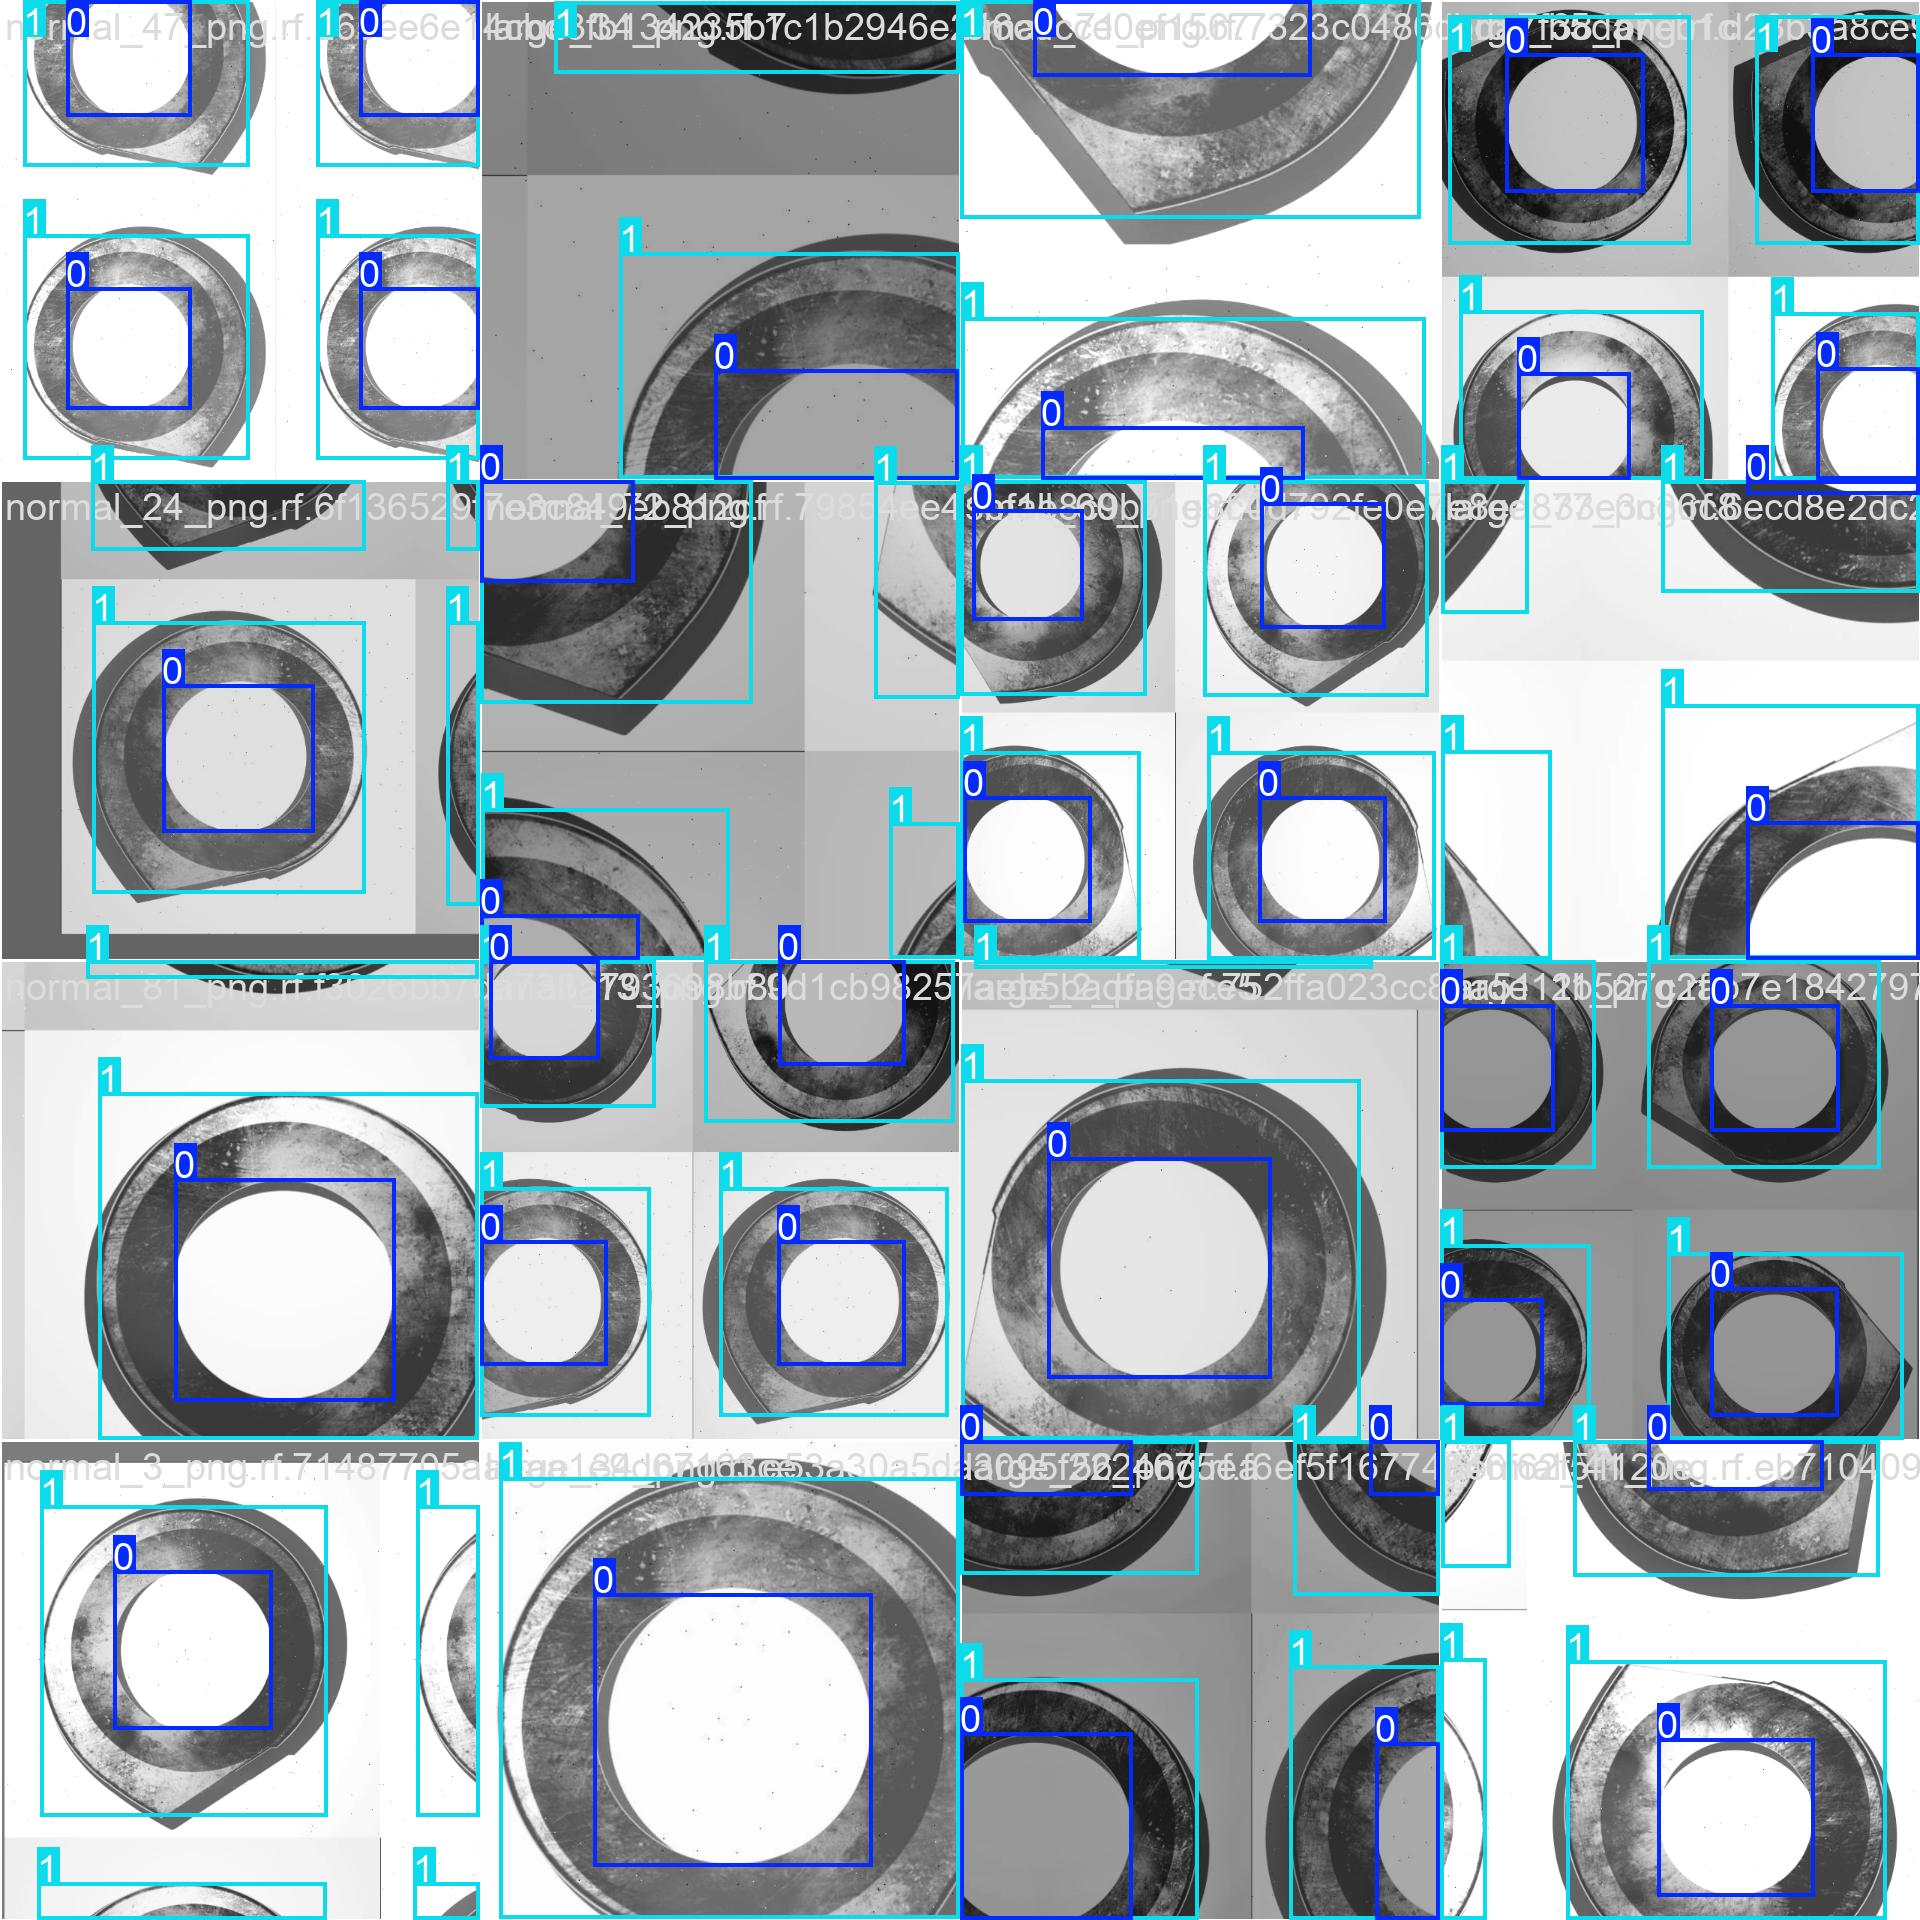

In [28]:
Image(filename= os.path.join(path, images[18]), width=1000)

In [29]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8x.pt")  # load an official model
model = YOLO(r"D:\Prakash\Object_detections\model1\detect\train\weights\best.pt")  # load a custom model hello

In [30]:
results = model(r"/content/Material_Detector_V2-1/test/images/large_13_png.rf.02b4935a323a1f883818405b3339d32e.jpg")  # predict on an image


image 1/1 /content/Material_Detector_V2-1/test/images/large_13_png.rf.02b4935a323a1f883818405b3339d32e.jpg: 640x640 1 Inner-Circle, 1 Outer-Circle, 82.5ms
Speed: 2.9ms preprocess, 82.5ms inference, 959.1ms postprocess per image at shape (1, 3, 640, 640)


In [31]:
results[0].boxes.xywh

tensor([[321.7860, 318.6312, 284.4080, 283.1150],
        [338.5553, 306.6877, 511.3876, 477.5898]], device='cuda:0')

In [32]:
results[0].boxes.conf

tensor([0.9679, 0.9596], device='cuda:0')